#### Notebook Author

**Nasirudeen Raheem**

## Hack The Feed: Insights From Social Media Data

In this notebook, we were able to implement the following solutions:

1. Data Understanding

2. Data Cleaning

3. Features Engineering

4. Exploratory Data Analyis

5. Data Insights for Business

6. Correlation Analysis

7. Regression Analysis

8. Sentiment Analyis

### Import necessary libraries

In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
%matplotlib inline

In [290]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
import wordcloud
from wordcloud import WordCloud
import string

import itertools
import collections
from collections import Counter

import nltk
#import contractions
import re

## For Entity Recognition
import spacy

## for feature extraction

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [291]:
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
import concurrent.futures
import time
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import warnings
warnings.filterwarnings('ignore')

### Helper Function

The purpose is to make the code more neater and remove code redundancy.

In [292]:
def extract_datetime_info(df, datetime_column):
    """
    Extracts hour, day of the week, month, and year from a DateTime column in a Pandas DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        datetime_column (str): The name of the DateTime column.
    
    Returns:
        pd.DataFrame: The DataFrame with additional columns for hour, day of the week, month, and year.
    """
    # Convert the specified DateTime column to a DateTime type
    
    # Extract hour, day of the week, month, and year
    df['Hour'] = df[datetime_column].dt.hour
    df['DayOfWeek'] = df[datetime_column].dt.dayofweek
    df['Month'] = df[datetime_column].dt.month
    df['Year'] = df[datetime_column].dt.year
    
    return df

### For Day of Week Mapping

dow_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

month_dict_by_number = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [293]:
def create_line_chart_with_labels(x, y, x_label=None, y_label=None, title=None, color='blue'):
    # Create a line chart
    plt.plot(x, y, marker='o', linestyle='-', color=color, label='Line Chart')

    # Annotate data points with their Y-values
    for i, y_val in enumerate(y):
        plt.text(x[i], y_val, f'{y_val}', ha='left', va='bottom')

    # Add labels and a title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

### Loading the data

In [294]:
fb_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.xls'
inst_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.xls'
twitter_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.xls'
likendln_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.xls'

In [295]:
facebook_df = pd.read_excel(fb_data)
instagram_df = pd.read_excel(inst_data)
twitter_df = pd.read_excel(twitter_data)
linkendln_df = pd.read_excel(likendln_data)

#### data investigation and familiarization

This include:

* First 5 rows of each data source

* Shape of the data

* Check data types of the data

* Check duplicate values

**First 5 rows of each data source**

In [296]:
facebook_df.head()

Date                           Post ID   Network Post Type  \
0   12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1  2019-04-05 10:01:00  253788558082460_2001824979945467  Facebook      Post   
2  2020-02-06 21:00:00  253788558082460_2768996106561680  Facebook      Post   
3  2022-09-05 10:37:00  253788558082460_4808157902645480  Facebook      Post   
4   7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  \
0  We celebrated recently with Novare, one of our...   
1  N5k can get you started today. Call 01 280 126...   
2  Still not sure whether to invest in the FGN Bo...   
3  Let nothing stop you from achieving your goals...   
4  If you were to pick one wish, what would it be...   

                                      Linked Content  ...  \
0  https://www.facebook.com/StanbicIBTC/videos/53...  ...   
1  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
2  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
3  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
4  https://www.facebook.com/StanbicIBTC/photos/a....  ...   

   Video Removed from Playlists  Annotation Impressions  \
0                           NaN                     NaN   
1                           NaN                     NaN   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   

   Annotation Clickable Impressions  Annotation Closable Impressions  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Annotation Closes  Card Impressions  Card Teaser Impressions  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   

   Card Teaser Clicks  Poll Votes       Tags  
0                 NaN         NaN  CIB Posts  
1                 NaN         NaN        NaN  
2                 NaN         NaN        NaN  
3                 NaN         NaN        NaN  
4                 NaN         NaN        NaN  

[5 rows x 147 columns]

In [297]:
instagram_df.head()

Date            Post ID    Network Post Type Content Type  \
0    1/30/2023 5:06 pm  18216468940204200  Instagram      Post     Carousel   
1    4/15/2022 9:04 am  17971531720518100  Instagram      Post        Photo   
2    5/28/2021 8:45 pm  18008486986321000  Instagram      Post        Video   
3  2023-04-01 16:08:00  17903404469640300  Instagram      Post     Carousel   
4  2021-07-12 18:52:00  17950858072558800  Instagram      Post        Photo   

       Profile        Sent by                                      Link  \
0  stanbicibtc                 https://www.instagram.com/p/CoC6CKBIHbV/   
1  stanbicibtc  Blessing Ubah  https://www.instagram.com/p/CcXUQTEMRm7/   
2  stanbicibtc                 https://www.instagram.com/p/CPbcdjygiaK/   
3  stanbicibtc                 https://www.instagram.com/p/Cm_2oino-Me/   
4  stanbicibtc  Blessing Ubah  https://www.instagram.com/p/CXMNAKFsjSs/   

                                                Post  Linked Content  ...  \
0  The new Naira banknotes in circulation have se...             NaN  ...   
1  We hope the faith that this #GoodFriday restor...             NaN  ...   
2  Reposted from @mzdosunmu My son's entry\n#ITCA...             NaN  ...   
3  The new Naira banknotes in circulation have se...             NaN  ...   
4  If you were born in June, ‚Äòcut soap for us o...             NaN  ...   

   Video Removed from Playlists  Annotation Impressions  \
0                           NaN                     NaN   
1                           NaN                     NaN   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   

   Annotation Clickable Impressions  Annotation Closable Impressions  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Annotation Closes  Card Impressions  Card Teaser Impressions  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   

   Card Teaser Clicks  Poll Votes  Tags  
0                 NaN         NaN   NaN  
1                 NaN         NaN   NaN  
2                 NaN         NaN   NaN  
3                 NaN         NaN   NaN  
4                 NaN         NaN   NaN  

[5 rows x 147 columns]

In [298]:
twitter_df.head()

Date              Post ID  Network Post Type Content Type  \
0   7/13/2023 10:57 am  1679429829567940096  Twitter     Tweet        Photo   
1  2023-12-07 20:03:00  1679204777081860096  Twitter     Tweet         Text   
2  2023-12-07 19:00:00  1679189012798660096  Twitter     Tweet        Photo   
3  2023-12-07 18:20:00  1679179017084349952  Twitter     Tweet        Photo   
4  2023-11-07 12:50:00  1678733396992740096  Twitter     Tweet        Photo   

         Profile        Sent by  \
0  '@StanbicIBTC   Sophia Amuka   
1  '@StanbicIBTC  Blessing Ubah   
2  '@StanbicIBTC  Blessing Ubah   
3  '@StanbicIBTC  Blessing Ubah   
4  '@StanbicIBTC   Sophia Amuka   

                                                Link  \
0  https://twitter.com/StanbicIBTC/status/1679429...   
1  https://twitter.com/StanbicIBTC/status/1679204...   
2  https://twitter.com/StanbicIBTC/status/1679189...   
3  https://twitter.com/StanbicIBTC/status/1679179...   
4  https://twitter.com/StanbicIBTC/status/1678733...   

                                                Post  \
0  Your money should not be a gamble. Before you ...   
1  What skill (s) do you have, that no one ever t...   
2  Sade was able to acquire a home loan and make ...   
3  Here are some mistakes you shouldn‚Äôt make du...   
4  Safeguard every aspect of your operations with...   

                                      Linked Content  ...  \
0  https://twitter.com/StanbicIBTC/status/1679429...  ...   
1                                                NaN  ...   
2  https://bit.ly/StanbicIBTCHomeLoans, https://t...  ...   
3  https://twitter.com/StanbicIBTC/status/1679179...  ...   
4  https://twitter.com/StanbicIBTC/status/1678733...  ...   

   Video Removed from Playlists  Annotation Impressions  \
0                           NaN                     NaN   
1                           NaN                     NaN   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   

   Annotation Clickable Impressions  Annotation Closable Impressions  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Annotation Closes  Card Impressions  Card Teaser Impressions  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   

   Card Teaser Clicks  Poll Votes  \
0                 NaN         NaN   
1                 NaN         NaN   
2                 NaN         NaN   
3                 NaN         NaN   
4                 NaN         NaN   

                                           Tags  
0                                     CIB Posts  
1                                           NaN  
2                           Weekly Wealth Posts  
3                                           NaN  
4  Insurance Limited Posts, Weekly Wealth Posts  

[5 rows x 147 columns]

In [299]:
linkendln_df.head()

Date              Post ID   Network Post Type Content Type  \
0   7/13/2023 12:03 pm  7085212016608449536  LinkedIn      Post        Photo   
1  2023-12-07 20:00:00  7084969706024999936  LinkedIn      Post         Text   
2  2023-12-07 19:00:00  7084954641788010496  LinkedIn      Post        Photo   
3  2023-11-07 14:49:00  7084529022105230336  LinkedIn      Post        Photo   
4  2023-11-07 09:17:00  7084445462967069696  LinkedIn      Post        Photo   

        Profile        Sent by  \
0  Stanbic IBTC  Blessing Ubah   
1  Stanbic IBTC  Blessing Ubah   
2  Stanbic IBTC  Blessing Ubah   
3  Stanbic IBTC  Blessing Ubah   
4  Stanbic IBTC  Blessing Ubah   

                                                Link  \
0  https://linkedin.com/feed/update/urn:li:share:...   
1  https://linkedin.com/feed/update/urn:li:share:...   
2  https://linkedin.com/feed/update/urn:li:ugcPos...   
3  https://linkedin.com/feed/update/urn:li:share:...   
4  https://linkedin.com/feed/update/urn:li:share:...   

                                                Post Linked Content  ...  \
0  Your money should not be a gamble. Before you ...            NaN  ...   
1  What skill (s) do you have, that no one ever t...            NaN  ...   
2  Sade was able to acquire a home loan and make ...            NaN  ...   
3  Safeguard every aspect of your operations with...            NaN  ...   
4  Together, we can make a difference and build a...            NaN  ...   

   Video Removed from Playlists  Annotation Impressions  \
0                           NaN                     NaN   
1                           NaN                     NaN   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   

   Annotation Clickable Impressions  Annotation Closable Impressions  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Annotation Closes  Card Impressions  Card Teaser Impressions  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   

   Card Teaser Clicks  Poll Votes                 Tags  
0                 NaN         NaN            CIB Posts  
1                 NaN         NaN                  NaN  
2                 NaN         NaN  Weekly Wealth Posts  
3                 NaN         NaN  Weekly Wealth Posts  
4                 NaN         NaN                  NaN  

[5 rows x 147 columns]

**Shape of the data**

In [300]:
print("The Shape of Facebook data is {} rows and {} columns".format(facebook_df.shape[0], facebook_df.shape[1]))
print("The Shape of Instagram data is {} rows and {} columns".format(instagram_df.shape[0], instagram_df.shape[1]))
print("The Shape of Twitter data is {} rows and {} columns".format(twitter_df.shape[0], twitter_df.shape[1]))
print("The Shape of Linkdeln data is {} rows and {} columns".format(linkendln_df.shape[0], linkendln_df.shape[1]))

The Shape of Facebook data is 9803 rows and 147 columns
The Shape of Instagram data is 10000 rows and 147 columns
The Shape of Twitter data is 8529 rows and 147 columns
The Shape of Linkdeln data is 7760 rows and 147 columns


**Observaion**

* we have 147 columns for all the data sources, and at the least engagement data is from **linkdeln** (7760) and most engagemnt data is from **Instagram**

#### Data types of each data

In [301]:
print('Facebook data information')
print('------------------------------------------------------------>')
print(facebook_df.info())
print('Instagram data information')
print('-------------------------------------------------------------->')
print(instagram_df.info())
print('Twitter data information')
print('--------------------------------------------------------------->')
print(twitter_df.info())
print('Linkdeln data information')
print('---------------------------------------------------------------->')
print(linkendln_df.info())


Facebook data information
------------------------------------------------------------>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Columns: 147 entries, Date to Tags
dtypes: float64(136), object(11)
memory usage: 11.0+ MB
None
Instagram data information
-------------------------------------------------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 147 entries, Date to Tags
dtypes: float64(133), int64(5), object(9)
memory usage: 11.2+ MB
None
Twitter data information
--------------------------------------------------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Columns: 147 entries, Date to Tags
dtypes: float64(136), int64(1), object(10)
memory usage: 9.6+ MB
None
Linkdeln data information
---------------------------------------------------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Columns: 147 entries, Date to Tags
d

**Observation**

* For **Facebook** data, we have 136 numerical columns, and 11 object columns (Post, link, Linked Content) Inclusive.

* For **Instagram** data, we have 133 numerical columns, 5 integers columns, and 9 object columns (Post, link, Linked Content) Inclusive.

* For **Twitter** data, we have 136 numerical columns, 1 integer columns, and 10 object columns (Post, link, Linked Content) Inclusive.

* For **Linkdeln** data, we have 136 numerical columns, 1 integer column, and 9 object columns (Post, link, Linked Content) Inclusive.

Make a table markdown:

**Check duplicate rows for each of the data source** 

In [302]:
facebook_df[facebook_df.duplicated()]

Empty DataFrame
Columns: [Date, Post ID, Network, Post Type, Content Type, Profile, Sent by, Link, Post, Linked Content, Impressions, Organic Impressions, Viral Impressions, Non-viral Impressions, Paid Impressions, Fan Impressions, Fan Organic Impressions, Fan Paid Impressions, Non-fan Impressions, Non-fan Organic Impressions, Non-fan Paid Impressions, Reach, Organic Reach, Viral Reach, Non-viral Reach, Paid Reach, Fan Reach, Fan Paid Reach, Potential Reach, Engagement Rate (per Impression), Engagement Rate (per Reach), Engagements, Reactions, Likes, Dislikes, Love Reactions, Haha Reactions, Wow Reactions, Sad Reactions, Angry Reactions, Comments, Shares, Saves, Click-Through Rate, Post Link Clicks, Other Post Clicks, Post Clicks (All), Post Media Clicks, Post Hashtag Clicks, Post Detail Expand Clicks, Profile Clicks, Post Photo View Clicks, Post Video Play Clicks, Other Engagements, Answers, App Engagements, App Install Attempts, App Opens, Follows from Post, Unfollows from Post, Negative Feedback, bit.ly Link Clicks, Engaged Users, Engaged Fans, Users Talking About This, Unique Reactions, Unique Comments, Unique Shares, Unique Answers, Unique Post Clicks, Unique Post Link Clicks, Unique Post Photo View Clicks, Unique Post Video Play Clicks, Unique Other Post Clicks, Unique Negative Feedback, Subscribers Gained from Video, Annotation Clicks, Card Clicks, Video Views, Media Views, Organic Video Views, Paid Video Views, Partial Video Views, Organic Partial Video Views, Paid Partial Video Views, Full Video Views, Full Video View Rate, Follow Video Views, For You Video Views, Hashtag Video Views, Business Account Video Views, Sound Video Views, Unspecified Video Views, Organic Full Video Views, Paid Full Video Views, Autoplay Video Views, Click to Play Video Views, Sound on Video Views, Sound off Video Views, 10-Second Video Views, ...]
Index: []

[0 rows x 147 columns]

In [303]:
instagram_df[instagram_df.duplicated()]

Empty DataFrame
Columns: [Date, Post ID, Network, Post Type, Content Type, Profile, Sent by, Link, Post, Linked Content, Impressions, Organic Impressions, Viral Impressions, Non-viral Impressions, Paid Impressions, Fan Impressions, Fan Organic Impressions, Fan Paid Impressions, Non-fan Impressions, Non-fan Organic Impressions, Non-fan Paid Impressions, Reach, Organic Reach, Viral Reach, Non-viral Reach, Paid Reach, Fan Reach, Fan Paid Reach, Potential Reach, Engagement Rate (per Impression), Engagement Rate (per Reach), Engagements, Reactions, Likes, Dislikes, Love Reactions, Haha Reactions, Wow Reactions, Sad Reactions, Angry Reactions, Comments, Shares, Saves, Click-Through Rate, Post Link Clicks, Other Post Clicks, Post Clicks (All), Post Media Clicks, Post Hashtag Clicks, Post Detail Expand Clicks, Profile Clicks, Post Photo View Clicks, Post Video Play Clicks, Other Engagements, Answers, App Engagements, App Install Attempts, App Opens, Follows from Post, Unfollows from Post, Negative Feedback, bit.ly Link Clicks, Engaged Users, Engaged Fans, Users Talking About This, Unique Reactions, Unique Comments, Unique Shares, Unique Answers, Unique Post Clicks, Unique Post Link Clicks, Unique Post Photo View Clicks, Unique Post Video Play Clicks, Unique Other Post Clicks, Unique Negative Feedback, Subscribers Gained from Video, Annotation Clicks, Card Clicks, Video Views, Media Views, Organic Video Views, Paid Video Views, Partial Video Views, Organic Partial Video Views, Paid Partial Video Views, Full Video Views, Full Video View Rate, Follow Video Views, For You Video Views, Hashtag Video Views, Business Account Video Views, Sound Video Views, Unspecified Video Views, Organic Full Video Views, Paid Full Video Views, Autoplay Video Views, Click to Play Video Views, Sound on Video Views, Sound off Video Views, 10-Second Video Views, ...]
Index: []

[0 rows x 147 columns]

In [304]:
twitter_df[twitter_df.duplicated()]

Empty DataFrame
Columns: [Date, Post ID, Network, Post Type, Content Type, Profile, Sent by, Link, Post, Linked Content, Impressions, Organic Impressions, Viral Impressions, Non-viral Impressions, Paid Impressions, Fan Impressions, Fan Organic Impressions, Fan Paid Impressions, Non-fan Impressions, Non-fan Organic Impressions, Non-fan Paid Impressions, Reach, Organic Reach, Viral Reach, Non-viral Reach, Paid Reach, Fan Reach, Fan Paid Reach, Potential Reach, Engagement Rate (per Impression), Engagement Rate (per Reach), Engagements, Reactions, Likes, Dislikes, Love Reactions, Haha Reactions, Wow Reactions, Sad Reactions, Angry Reactions, Comments, Shares, Saves, Click-Through Rate, Post Link Clicks, Other Post Clicks, Post Clicks (All), Post Media Clicks, Post Hashtag Clicks, Post Detail Expand Clicks, Profile Clicks, Post Photo View Clicks, Post Video Play Clicks, Other Engagements, Answers, App Engagements, App Install Attempts, App Opens, Follows from Post, Unfollows from Post, Negative Feedback, bit.ly Link Clicks, Engaged Users, Engaged Fans, Users Talking About This, Unique Reactions, Unique Comments, Unique Shares, Unique Answers, Unique Post Clicks, Unique Post Link Clicks, Unique Post Photo View Clicks, Unique Post Video Play Clicks, Unique Other Post Clicks, Unique Negative Feedback, Subscribers Gained from Video, Annotation Clicks, Card Clicks, Video Views, Media Views, Organic Video Views, Paid Video Views, Partial Video Views, Organic Partial Video Views, Paid Partial Video Views, Full Video Views, Full Video View Rate, Follow Video Views, For You Video Views, Hashtag Video Views, Business Account Video Views, Sound Video Views, Unspecified Video Views, Organic Full Video Views, Paid Full Video Views, Autoplay Video Views, Click to Play Video Views, Sound on Video Views, Sound off Video Views, 10-Second Video Views, ...]
Index: []

[0 rows x 147 columns]

In [305]:
linkendln_df[linkendln_df.duplicated()]

Empty DataFrame
Columns: [Date, Post ID, Network, Post Type, Content Type, Profile, Sent by, Link, Post, Linked Content, Impressions, Organic Impressions, Viral Impressions, Non-viral Impressions, Paid Impressions, Fan Impressions, Fan Organic Impressions, Fan Paid Impressions, Non-fan Impressions, Non-fan Organic Impressions, Non-fan Paid Impressions, Reach, Organic Reach, Viral Reach, Non-viral Reach, Paid Reach, Fan Reach, Fan Paid Reach, Potential Reach, Engagement Rate (per Impression), Engagement Rate (per Reach), Engagements, Reactions, Likes, Dislikes, Love Reactions, Haha Reactions, Wow Reactions, Sad Reactions, Angry Reactions, Comments, Shares, Saves, Click-Through Rate, Post Link Clicks, Other Post Clicks, Post Clicks (All), Post Media Clicks, Post Hashtag Clicks, Post Detail Expand Clicks, Profile Clicks, Post Photo View Clicks, Post Video Play Clicks, Other Engagements, Answers, App Engagements, App Install Attempts, App Opens, Follows from Post, Unfollows from Post, Negative Feedback, bit.ly Link Clicks, Engaged Users, Engaged Fans, Users Talking About This, Unique Reactions, Unique Comments, Unique Shares, Unique Answers, Unique Post Clicks, Unique Post Link Clicks, Unique Post Photo View Clicks, Unique Post Video Play Clicks, Unique Other Post Clicks, Unique Negative Feedback, Subscribers Gained from Video, Annotation Clicks, Card Clicks, Video Views, Media Views, Organic Video Views, Paid Video Views, Partial Video Views, Organic Partial Video Views, Paid Partial Video Views, Full Video Views, Full Video View Rate, Follow Video Views, For You Video Views, Hashtag Video Views, Business Account Video Views, Sound Video Views, Unspecified Video Views, Organic Full Video Views, Paid Full Video Views, Autoplay Video Views, Click to Play Video Views, Sound on Video Views, Sound off Video Views, 10-Second Video Views, ...]
Index: []

[0 rows x 147 columns]

**Observation**

* Each rows for each data source (Facebook, Instagram, Twitter, and Linkdeln) are free from being a duplicate. i.e Observation collected have high data quality.

#### Data Cleaning and Pre-processing: 

* Handling missing values for each data source

* Convert the data types to right format


**Handling missing values**

This is the process of correcting missingness in our dataset.

The following steps are used in handling missing values of the data sets.

1. Drop any columns with more than 70% missing values

2. Drop any rows with missing posts

3. Drop redundant features

4. Drop some columns redudancy using correlation (i.e they have the same trend)

5. Missing values imputations.

In [306]:
fb_mv = (facebook_df.isnull().sum() / len(facebook_df)*100).reset_index().rename(columns={"index":'column', 0:'missing_value_percent'})
ins_mv = (instagram_df.isnull().sum() / len(instagram_df)*100).reset_index().rename(columns={"index":'column', 0:'missing_value_percent'})
twit_mv = (twitter_df.isnull().sum() / len(twitter_df)*100).reset_index().rename(columns={"index":'column', 0:'missing_value_percent'})
ld_mv = (linkendln_df.isnull().sum() / len(linkendln_df)*100).reset_index().rename(columns={"index":'column', 0:'missing_value_percent'})

In [307]:
print(len(fb_mv[fb_mv['missing_value_percent'] != 0.0]['column']) / len(facebook_df.columns))
print(len(ins_mv[ins_mv['missing_value_percent'] != 0.0]['column'])/ len(instagram_df.columns))
print(len(twit_mv[twit_mv['missing_value_percent'] != 0.0]['column'])/ len(twitter_df.columns))
print(len(ld_mv[ld_mv['missing_value_percent'] != 0.0]['column'])/ len(linkendln_df.columns))

0.9455782312925171
0.9183673469387755
0.9455782312925171
0.9523809523809523


**Observation**

* we observe that from each data source we have at least close to 92% of missing columns, which is from Instagram data source.



In [308]:
## selecting columns with greater than 70% missing values
fb_mv_missing_col = fb_mv[fb_mv['missing_value_percent'] > 70.0]['column'].to_list()
print("The length of the missing columns > 70% is == {} for Facebook data".format(len(fb_mv_missing_col)))

The length of the missing columns > 70% is == 90 for Facebook data


In [309]:
## selecting columns with greater than 70% missing values
ins_mv_missing_col = ins_mv[ins_mv['missing_value_percent'] > 70.0]['column'].to_list()
print("The length of the missing columns > 70% is == {} for Instagram data".format(len(ins_mv_missing_col)))

The length of the missing columns > 70% is == 127 for Instagram data


In [310]:
## selecting columns with greater than 70% missing values
twit_mv_missing_col = twit_mv[twit_mv['missing_value_percent'] > 70.0]['column'].to_list()
print("The length of the missing columns > 70% is == {} for Twitter data".format(len(twit_mv_missing_col)))

The length of the missing columns > 70% is == 113 for Twitter data


In [311]:
## selecting columns with greater than 70% missing values
ld_mv_missing_col = ld_mv[ld_mv['missing_value_percent'] > 70.0]['column'].to_list()
print("The length of the missing columns > 70% is == {} for Linkdeln data".format(len(ld_mv_missing_col)))

The length of the missing columns > 70% is == 127 for Linkdeln data


#### Drop all columns with more than 70% missing values

In [312]:
## having copy of all the data source
facebook_df_copy = facebook_df.copy()
instagram_df_copy = instagram_df.copy()
twitter_df_copy = twitter_df.copy()
linkendln_df_copy = linkendln_df.copy()

In [313]:
## drop the columns
facebook_df = facebook_df.drop(fb_mv_missing_col, axis=1)
instagram_df = instagram_df.drop(ins_mv_missing_col, axis=1)
twitter_df = twitter_df.drop(twit_mv_missing_col, axis=1)
linkendln_df = linkendln_df.drop(ld_mv_missing_col, axis=1)

#### Carefully analyze the remaining missing values for each data source

* One rule of thumb, drop any rows with the **post** missing (This helps to avoid anomalies in our analysis).

## Facebook Analysis

In [314]:
## drop rows with Post as a missing value
facebook_df = facebook_df[~facebook_df['Post'].isna()].reset_index(drop=True)

**check for columns with one unique value**

This will help help us to drop redundant features.

In [315]:
redudant_col = [x for x in facebook_df.select_dtypes(exclude='O') if facebook_df[x].nunique() == 1]

In [316]:
facebook_df = facebook_df.drop(redudant_col, axis=1) ## dropping columns with a redudant values

In [317]:
facebook_df[['Likes', 'Reactions']]

Likes  Reactions
0     176.0      179.0
1     747.0      762.0
2     458.0      465.0
3     101.0      102.0
4     383.0      413.0
...     ...        ...
9548    NaN        NaN
9549    NaN        NaN
9550    NaN        NaN
9551    NaN        NaN
9552    NaN        NaN

[9553 rows x 2 columns]

In [318]:
# Calculate the correlation matrix
correlation_matrix = facebook_df.corr(numeric_only=True)

# Create a mask to select the upper triangle of the correlation matrix
mask = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                    .abs()
                    .gt(0.9))

# List of redundant column pairs
redundant_columns_by_correlation = [column for column in mask.columns if any(mask[column])]

# Print the redundant column pairs
print("Redundant Columns:", redundant_columns_by_correlation)

Redundant Columns: ['Organic Impressions', 'Non-viral Impressions', 'Fan Impressions', 'Fan Organic Impressions', 'Non-fan Organic Impressions', 'Reach', 'Organic Reach', 'Viral Reach', 'Non-viral Reach', 'Fan Reach', 'Engagement Rate (per Reach)', 'Reactions', 'Likes', 'Post Clicks (All)', 'Engaged Users', 'Engaged Fans', 'Unique Reactions', 'Unique Answers', 'Unique Post Clicks', 'Unique Post Photo View Clicks', 'Unique Other Post Clicks', 'Unique Negative Feedback']


In [319]:
facebook_column = ['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Reach', 'Engagements', 'Likes',
       'Love Reactions', 'Haha Reactions', 'Wow Reactions', 'Sad Reactions',
       'Angry Reactions','Comments', 'Shares', 'Click-Through Rate',
                  'Answers', 'Negative Feedback', 'Engaged Users']

In [320]:
facebook_df = facebook_df[facebook_column]

In [321]:
facebook_df.isnull().sum()

Date                    0
Post ID                 0
Network                 0
Post Type               0
Content Type            0
Profile                 0
Sent by                 0
Link                    0
Post                    0
Impressions           810
Reach                 810
Engagements           810
Likes                 810
Love Reactions        810
Haha Reactions        810
Wow Reactions         810
Sad Reactions         810
Angry Reactions       810
Comments              810
Shares                810
Click-Through Rate    810
Answers               810
Negative Feedback     810
Engaged Users         810
dtype: int64

**Noted**

* Based on research, it is noted that the post with missing **Impressions**, **Reach**, **Engagements**, and others are due to deleted post, which the social media content creator finds an error, and deleted from the platform before engagement.

**Example 1**

**Post in the dataset with missing metrics** - Dbanj performing at the 2013 Orange AFCON closing ceremony. 

**Original Post online** - Nigerian artist Dbanj performs during the 2013 Orange African Cup of Nations Closing ceremony from the National Stadium on February 10, 2013 in Soweto, South Africa.

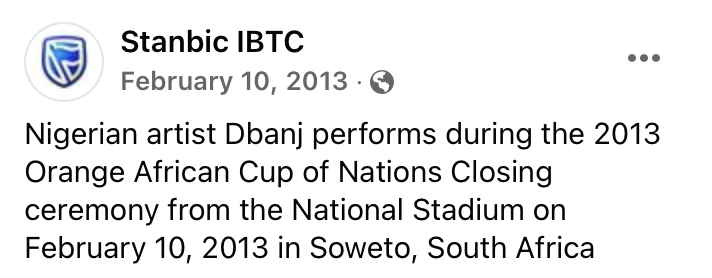

**Example 2**

**Post in the dataset with missing metrics** - New experience center alert! \uf8ffüíÉ\uf8ffüèæ\uf8ffüï∫\uf8ffüèæ\nStanbic IBTC Pension Managers has a new office  at 47, Opebi Road, Ikeja.

**Lastly**

Most of the Posts have a missing name of the content creator with 91.11% 


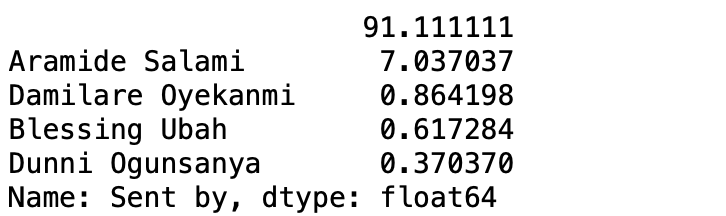

In [322]:
facebook_df = facebook_df.dropna(subset=['Impressions', 'Reach', 'Engagements']).reset_index(drop=True)

In [323]:
facebook_df.isnull().sum()

Date                  0
Post ID               0
Network               0
Post Type             0
Content Type          0
Profile               0
Sent by               0
Link                  0
Post                  0
Impressions           0
Reach                 0
Engagements           0
Likes                 0
Love Reactions        0
Haha Reactions        0
Wow Reactions         0
Sad Reactions         0
Angry Reactions       0
Comments              0
Shares                0
Click-Through Rate    0
Answers               0
Negative Feedback     0
Engaged Users         0
dtype: int64

**Handling the missing values from missing sent by column**

In [324]:
facebook_df['Sent by'] = facebook_df['Sent by'].replace(' ', 'unknown')

### Pre-process data

This is the section to correct some columns to their original data types.

* Convert date to the date time.

* Convert float data types to Integers (Optimization).

In [325]:
facebook_df['Date'] = pd.to_datetime(facebook_df['Date'])

In [326]:
### code to convert float data type to integer
for wrong_dtype in facebook_df.select_dtypes(include='float64').columns:
    facebook_df[wrong_dtype] = facebook_df[wrong_dtype].astype(int)

In [327]:
## Generate the date time features
facebook_df = extract_datetime_info(facebook_df, 'Date')

In [328]:
facebook_df['DayOfWeek'] = facebook_df['DayOfWeek'].map(dow_mapping)

In [329]:
facebook_df['Month'] = facebook_df['Month'].map(month_dict_by_number)

### Exploratory Data Analysis

This is the section we explore our dataset, to generate insight.

The Analysis will be divided, into 2 types:

* Univariate Analysis - To Explore our data

* Bi-variate and Multi-variate 

**Question 1**

What is the yearly trend of post on Facebook?

Purpose - This will help us to know, if Stanbic Bank are growing with social media advertistment trend

In [330]:
year_trend = facebook_df['Year'].value_counts().reset_index().rename(columns={'index':'Year', 'Year':'Trend'})

In [331]:
year_trend = year_trend.sort_values(by='Year').reset_index(drop=True)

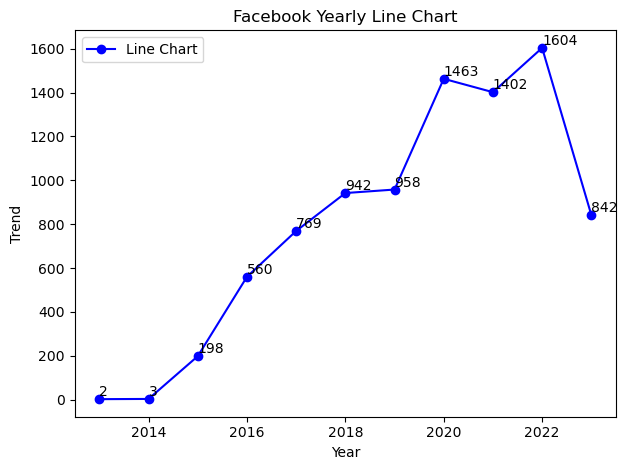

In [332]:
create_line_chart_with_labels(year_trend['Year'], year_trend['Trend'], x_label='Year', y_label='Trend', title='Facebook Yearly Line Chart')

**Observation**

* we observed that we recorded most post at year **2022** as at the month of September 2023.

**Question 2**

Who is the most active social media content creator on Facebook

In [333]:
dc = sns.color_palette()[0] ## setting default color

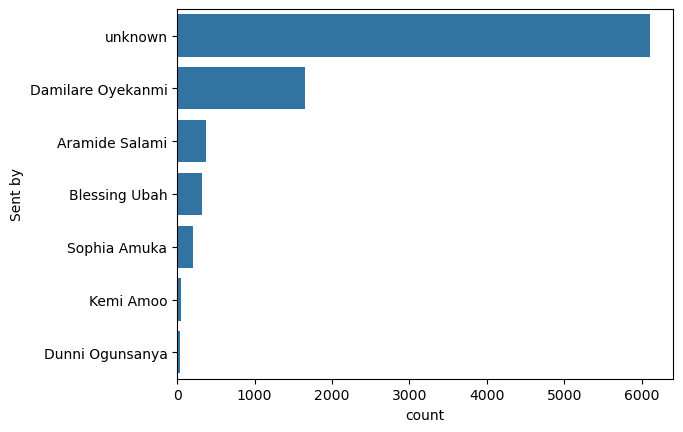

In [334]:
sns.countplot(y=facebook_df['Sent by'], color=dc, order=facebook_df['Sent by'].value_counts().keys());

**Observation**

* Most content creator name on facebook is missing (due to data ingestion) error.

* According to the name, Damilare Oyekanmi handles most Facebook posts.

**Question 3**

The most common Content Type post on Facebook?

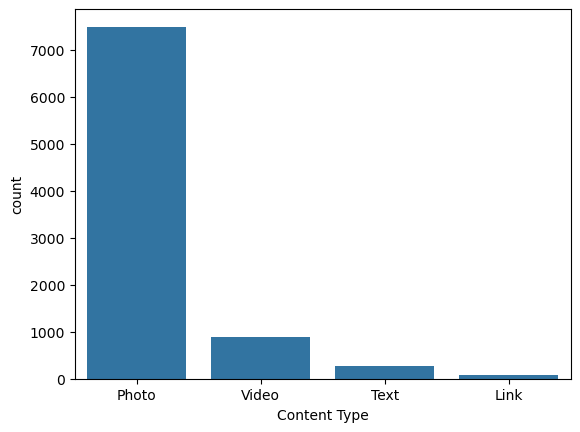

In [335]:
sns.countplot(x=facebook_df['Content Type'], color=dc, order=facebook_df['Content Type'].value_counts().keys());

**Observation**

* Most posts are associated with Photo, then Video, Text, and the least is Link.

**Question 4**

On which day, did they post on Facebook the most?

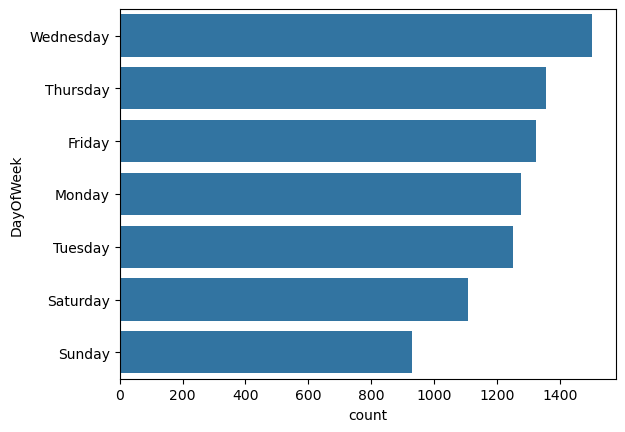

In [336]:
sns.countplot(y=facebook_df['DayOfWeek'], color=dc, order=facebook_df['DayOfWeek'].value_counts().keys());

**Observation** 

* Most posts are posted on **Wednesday**

**Question 5**

* What is the Month's Frequency?

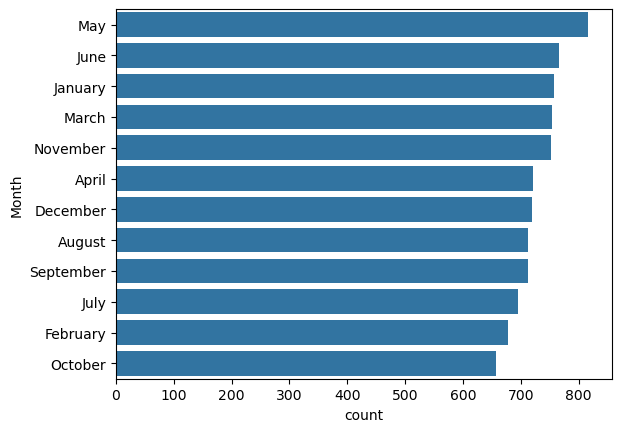

In [337]:
sns.countplot(y=facebook_df['Month'], color=dc, order=facebook_df['Month'].value_counts().keys());

**Observation**

* The bank is consistent with posting every month

**Question 6**

* What is the Hour Frequency?

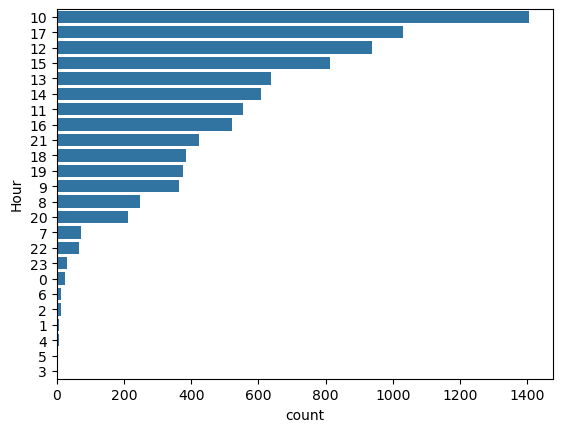

In [338]:
sns.countplot(y=facebook_df['Hour'], color=dc, order=facebook_df['Hour'].value_counts().keys());

In [339]:
facebook_df['Time_Zone'] = ['Morning' if 0 <= hour < 12 else 'Afternoon' if hour <=18 else 'Evening' for hour in facebook_df['Hour']]

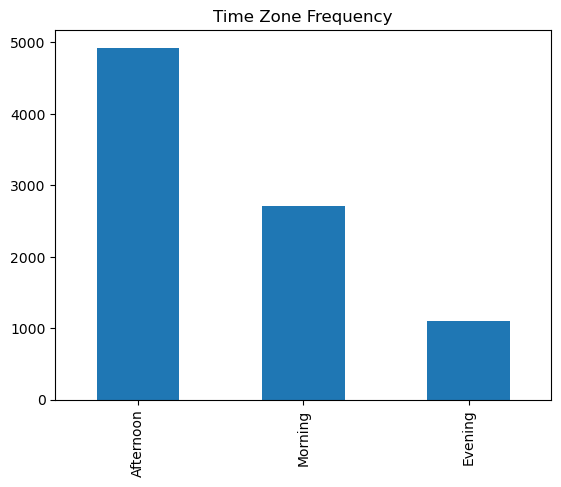

In [340]:
plt.title('Time Zone Frequency')
facebook_df['Time_Zone'].value_counts().plot(kind='bar');

**Observation**

* Most posts are made at 10:00AM in the morning

* According to time zone most post are made in the afternoon.

### Define Key Questions on Facebook Data

This is the section we observe trend for future recommendation

**Key Question 1**

**What is the relationship between Engagements and Impressions?**

* This will be done by visuals and statistical analysis

In [499]:
fig1 = px.scatter(facebook_df, x='Impressions', y='Engagements', title='Impressions and Engagements for Facebook')
fig1.update_traces(marker=dict(size=12))  # Adjust marker size
fig1.show()

In [500]:
stats.pearsonr(facebook_df['Impressions'], facebook_df['Engagements'])

PearsonRResult(statistic=0.23384813922049213, pvalue=6.588142230751284e-109)

**Observation**

* We observed a linear trend between Engagements and Impressions

* They are partially positively correlated with close to 24%

* They are statistically significant (p-value is less than 0.05)

**Key Questions 2**

**What are the most Engaging type of post?**

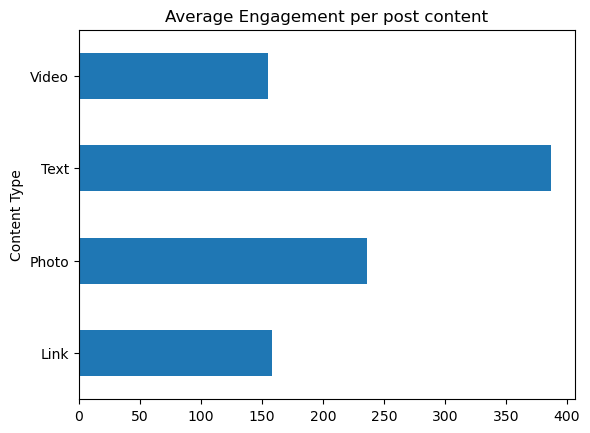

In [343]:
plt.title('Average Engagement per post content')
facebook_df.groupby('Content Type')['Engagements'].mean().plot(kind='barh');

**Observation**

* The most engaging type of post on average is **Text** type and the least is **Video** type 

**Key Question 3**

**Which day has the highest peak for post Engagements?**

we check overall best engagement day and quality of engagement in each day of the week.

In [344]:
facebook_df.groupby('DayOfWeek')['Engagements'].agg(['sum', 'mean']).reset_index().sort_values(by=['sum','mean'], ascending=False).style.background_gradient(cmap="Blues")

In [345]:
facebook_df['DayOfWeek'].value_counts()

Wednesday    1502
Thursday     1357
Friday       1324
Monday       1275
Tuesday      1250
Saturday     1107
Sunday        928
Name: DayOfWeek, dtype: int64

**Observation**

* Thursday is the peak day for post engagement.

In [346]:
#facebook_df['Post'].apply(lambda x:len(x))

**Key Question 4**

**Which Social media content creator has a quality performance on Engagement?**

In [347]:
facebook_df.groupby('Sent by')['Engagements'].mean().reset_index().sort_values(by='Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Aramide Salami's post is more quality, than other social media content creator.

**Key Question 5**

**Which content type has influence on Angry reations the most?**

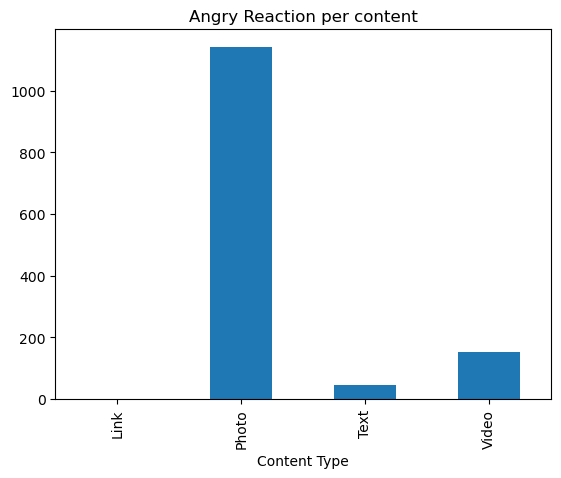

In [348]:
plt.title('Angry Reaction per content')
facebook_df.groupby('Content Type')['Angry Reactions'].sum().plot(kind='bar');

**Observation**

* Photo and Video content type influence most Angry reactions.

**Key Question 6**

**On which hour of the hours of the day did we see more likes, shares, Love (Reaction) of a post?**

In [349]:
hourly_engagement = facebook_df.groupby('Hour')[['Shares', 'Likes','Love Reactions']].sum()

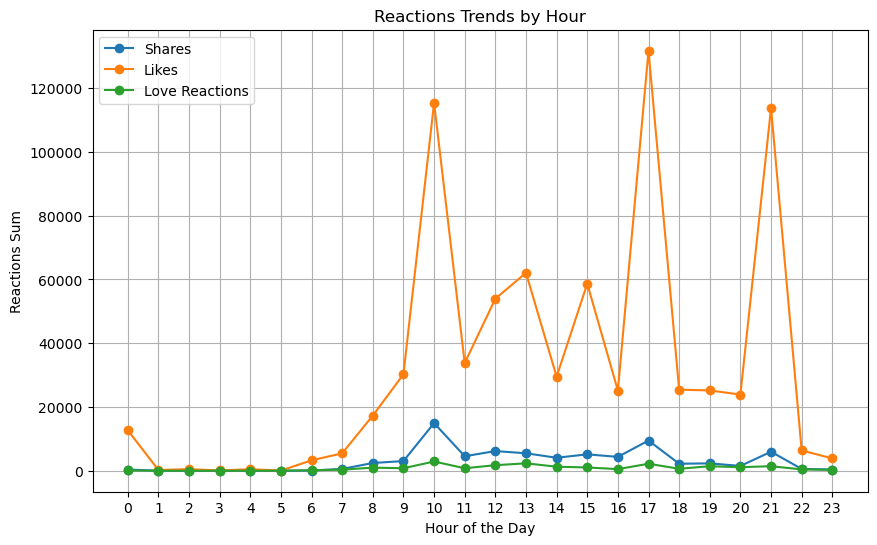

In [350]:
# Create a trend plot
plt.figure(figsize=(10, 6))

# Plot 'Shares'
plt.plot(hourly_engagement.index, hourly_engagement['Shares'], label='Shares', marker='o')
# Plot 'Likes'
plt.plot(hourly_engagement.index, hourly_engagement['Likes'], label='Likes', marker='o')
# Plot 'Love Reactions'
plt.plot(hourly_engagement.index, hourly_engagement['Love Reactions'], label='Love Reactions', marker='o')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Reactions Sum')
plt.title('Reactions Trends by Hour')
plt.xticks(hourly_engagement.index)
plt.grid(True)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


**Observation**

* More Likes, and Shares are observed at 17:00 PM (Closing time) for business, 10:00 AM (After stand up meeting) and 21:00 PM (Sleeping time) for Facebook users.

### Dive deeper insight on Facebook data

In this section, we are interested in uncovering pattern from the **Post Content** using Natural Language Processing techniques.

1. Feature Engineering

2. Statistical Approach.

3. Machine Learning Approach.

### Feature Engineering

In order to answer some questions, we have to engineer some key features

1. Length of each Post

2. Count of hastags in each post.

In [351]:
facebook_df['Post_Length'] = facebook_df['Post'].str.len()

In [352]:
facebook_df['Hashtag_count'] = facebook_df['Post'].str.count(r'#\w+')

### Statistical Insight

**Key Question 7**

**Are there relationships between the length of a post and engagement?**

In [498]:
fig_1 = px.scatter(facebook_df, x='Post_Length', y='Engagements', title='Post_Length and Engagements')
fig_1.update_traces(marker=dict(size=12))  # Adjust marker size
fig_1.show()

In [354]:
from sklearn.linear_model import LinearRegression
# Extract X and Y
X = facebook_df[['Post_Length']]
Y = facebook_df['Engagements']

In [355]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [356]:
# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model -0.26397378502098434 | Intercept of the model 277.3968710766466


**Observation**

* Longer text doesn't mean there will be increase in engagements.

* shorter text tends to receive slightly higher engagement compared to longer text, However, the effect is relatively small.

**Key Question 8**

**Are there relationships between the count of Hashtags of a post and engagement?**

In [357]:
# Extract X and Y
X = facebook_df[['Hashtag_count']]
Y = facebook_df['Engagements']

In [358]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [359]:
# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model -46.99585515023058 | Intercept of the model 287.6109691066349


**Observation**

* Fewer hashtags are predicted to receive higher engagement, than a post with many hashtags.

### Machine Learning Approach (Natural Language processing) 

* Sentiment Analysis


### Sentiment Analysis

Having a sentiment analysis software can be used to improve the Brand Image, and content quality to derive engagement over time.

In [360]:
## Install vaderSentiment
#!pip install vaderSentiment

In [361]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [362]:
analyzer = SentimentIntensityAnalyzer()

In [363]:
facebook_df['text_polarity'] = facebook_df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [364]:
# Interpret the score
def sentiment_tag(score):
    if score >= 0.05:
        return "Positive sentiment"
    elif score <= -0.05:
        return "Negative sentiment"
    else:
        return "Neutral sentiment"

In [365]:
facebook_df['sentiment_label'] =facebook_df['text_polarity'].map(sentiment_tag)

In [366]:
(facebook_df['sentiment_label'].value_counts(normalize=True) * 100).round(2)

Positive sentiment    70.77
Neutral sentiment     21.42
Negative sentiment     7.81
Name: sentiment_label, dtype: float64

In [367]:
facebook_df['sentiment_label'].value_counts()

Positive sentiment    6187
Neutral sentiment     1873
Negative sentiment     683
Name: sentiment_label, dtype: int64

In [368]:
((6187 * 1 + 1873*0 + 683 * -1)/ len(facebook_df['sentiment_label'])* 100)

62.95321971863205

**Observation**

* Only 7.81% of the post realeased on Facebook are seen as Negative post.

* The Net Sentiment Score is 62.95%

**Key Question 9**

**Which content creator's post is more of positive readable to the system**

In [369]:
facebook_df.groupby('Sent by')['text_polarity'].mean().reset_index().sort_values('text_polarity', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Kemi Amoo's post have been the most positive post on Facebook.

**Key Question 10**

**Average Engagement per sentiment label**

In [370]:
facebook_df.groupby('sentiment_label')['Engagements'].mean().reset_index().sort_values('Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* we observed that Neutral post derives more engagement.

* Negative sentiment also derives engagement, could be a double edge sword for the bank, which needs to be reduced.

## Instagram Analysis

In [371]:
## drop rows with Post as a missing value
instagram_df = instagram_df[~instagram_df['Post'].isna()].reset_index(drop=True)

In [372]:
### drop Engagement Rate (per Impression) and Engagement Rate (per Reach) 
to_drop = ['Engagement Rate (per Impression)','Engagement Rate (per Reach)']

In [373]:
instagram_df = instagram_df.drop(to_drop, axis=1)

In [374]:
instagram_df.isnull().sum()

Date                      0
Post ID                   0
Network                   0
Post Type                 0
Content Type              0
Profile                   0
Sent by                   0
Link                      0
Post                      0
Impressions            1482
Organic Impressions    1482
Reach                  1482
Organic Reach          1482
Engagements               0
Reactions                 0
Likes                     0
Comments                  0
Saves                  1482
dtype: int64

In [375]:
instagram_df['Sent by'] = instagram_df['Sent by'].replace(' ', 'unknown')

**Observation**

* Instagram data has missing impressions, but no missing engagement.

**Solution**

* Fill the missing values with 0

In [376]:
instagram_df = instagram_df.fillna(value=0)

### Pre-process data

This is the section to correct some columns to their original data types.

* Convert date to the date time.

* Convert float data types to Integers (Optimization).

In [377]:
instagram_df['Date'] = pd.to_datetime(instagram_df['Date'])

In [378]:
### code to convert float data type to integer
for wrong_dtype in instagram_df.select_dtypes(include='float64').columns:
    instagram_df[wrong_dtype] = instagram_df[wrong_dtype].astype(int)

    
## Generate the date time features
instagram_df = extract_datetime_info(instagram_df, 'Date')

instagram_df['DayOfWeek'] = instagram_df['DayOfWeek'].map(dow_mapping)

instagram_df['Month'] = instagram_df['Month'].map(month_dict_by_number)

**Question 1**

What is the yearly trend of post on Instagram?

Purpose - This will help us to know, if Stanbic Bank are growing with social media advertistment trend

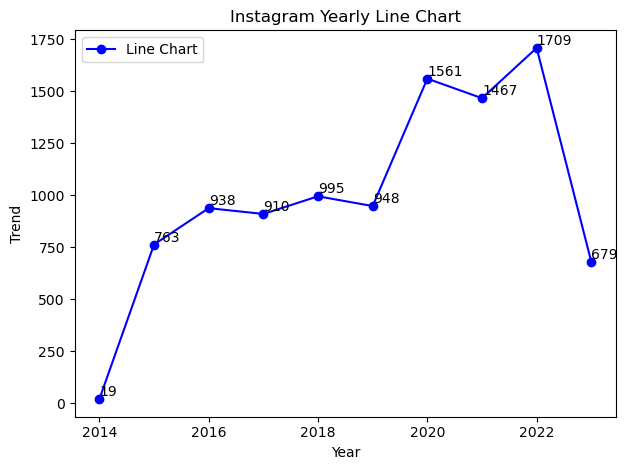

In [379]:
year_trend = instagram_df['Year'].value_counts().reset_index().rename(columns={'index':'Year', 'Year':'Trend'})
year_trend = year_trend.sort_values(by='Year').reset_index(drop=True)
create_line_chart_with_labels(year_trend['Year'], year_trend['Trend'], x_label='Year', y_label='Trend', title='Instagram Yearly Line Chart')

**Observation**

* we observed that we recorded most posts in **2022** as at the month of September 2023.

**Question 2**

Who is the most active social media content creator on Instagram?

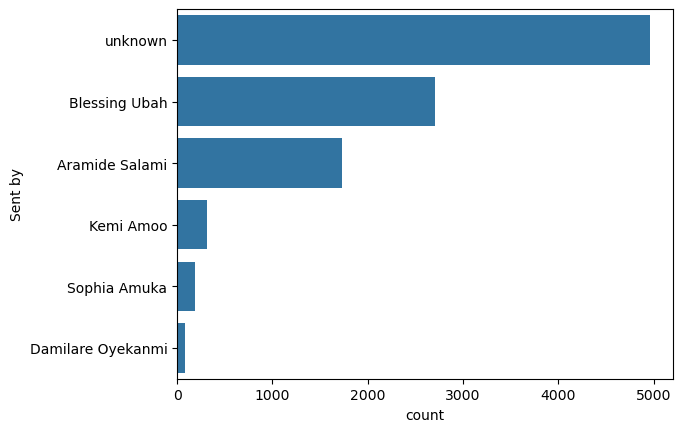

In [380]:
sns.countplot(y=instagram_df['Sent by'], color=dc, order=instagram_df['Sent by'].value_counts().keys());

**Observation**

* Most content creator name on Instagram are missing (due to data ingestion) error.

* According to the name, Blessing Ubah handles most Instagram posts.

**Question 3**

The most common Content Type post on Instagram?

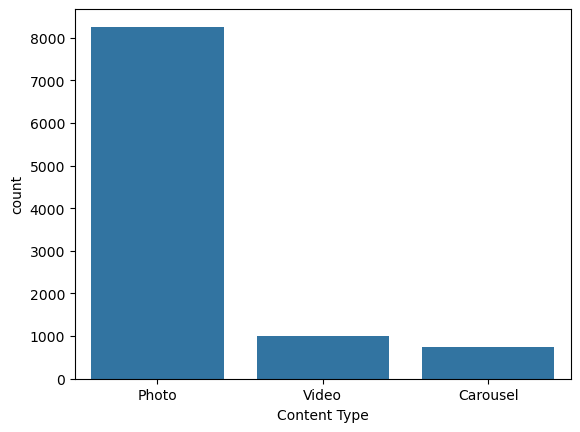

In [381]:
sns.countplot(x=instagram_df['Content Type'], color=dc, order=instagram_df['Content Type'].value_counts().keys());

**Observation**

* Most post are associated with Photo which has the highest peak, then Video and Carousel.

**Question 4**

On which day, did they most post on Instagram?

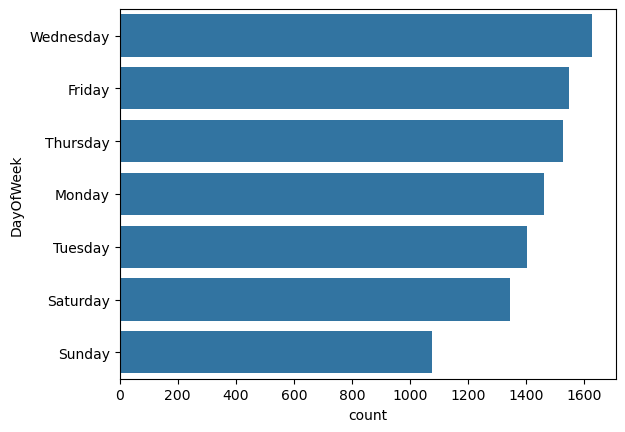

In [382]:
sns.countplot(y=instagram_df['DayOfWeek'], color=dc, order=instagram_df['DayOfWeek'].value_counts().keys());

**Observation** 

* Most posts are posted on **Wednesday**

**Question 5**

* What is the Month Frequency?

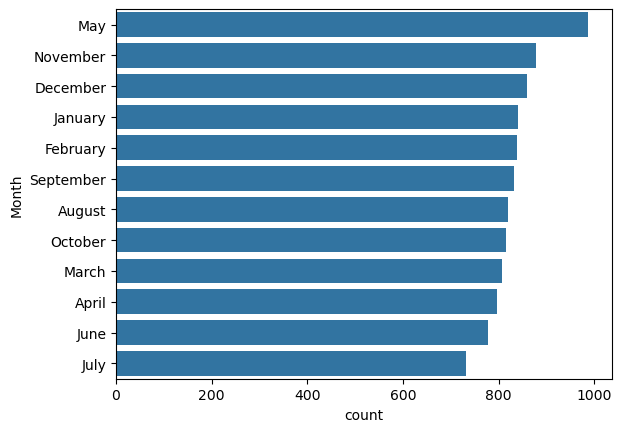

In [383]:
sns.countplot(y=instagram_df['Month'], color=dc, order=instagram_df['Month'].value_counts().keys());

**Observation**

* The bank is consistent with posting every month

**Question 6**

* What is the Hour Frequency?

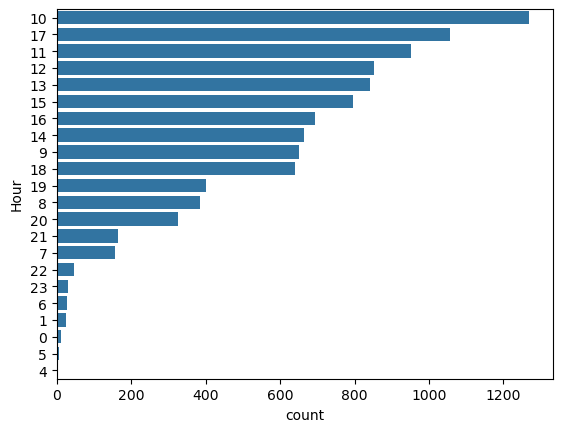

In [384]:
sns.countplot(y=instagram_df['Hour'], color=dc, order=instagram_df['Hour'].value_counts().keys());

In [385]:
instagram_df['Time_Zone'] = ['Morning' if 0 <= hour < 12 else 'Afternoon' if hour <=18 else 'Evening' for hour in instagram_df['Hour']]

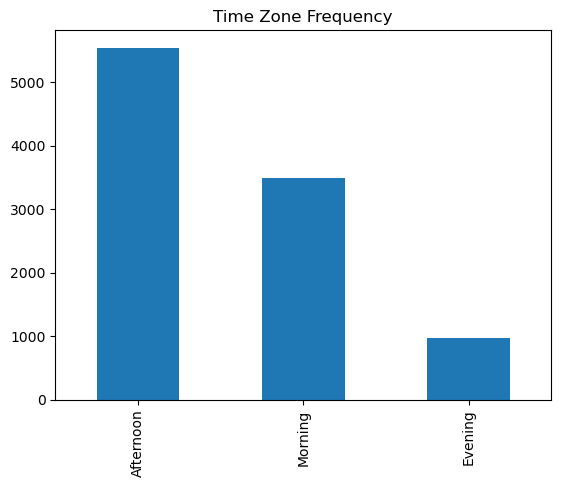

In [386]:
plt.title('Time Zone Frequency')
instagram_df['Time_Zone'].value_counts().plot(kind='bar');

**Observation**

* Most posts are made at 10:00AM in the morning

* According to time zone, most posts are made in the afternoon.

### Define Key Questions on Instagram Data

This is the section we observe trend for future recommendation(s)

**Key Question 1**

**What is the relationship between Engagements and Impressions?**

* This will be done by visuals and statistical analysis

In [497]:
fig2 = px.scatter(instagram_df, x='Impressions', y='Engagements', title='Impressions and Engagements for Instagram')
fig2.update_traces(marker=dict(size=12))  # Adjust marker size
fig2.show()

In [388]:
stats.pearsonr(instagram_df['Impressions'], instagram_df['Engagements'])

PearsonRResult(statistic=0.053845223689374624, pvalue=7.252807845420203e-08)

**Observation**

* We observed a linear trend between Engagements and Impressions

* They are partially positively correlated with close to 5%

* They are statistically significant (p-value is less than 0.05)

**Key Questions 2**

**What are the most Engaging type of post?**

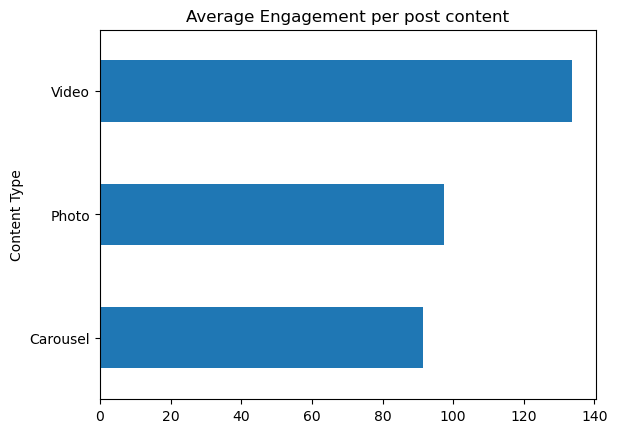

In [389]:
plt.title('Average Engagement per post content')
instagram_df.groupby('Content Type')['Engagements'].mean().plot(kind='barh');

**Observation**

* The most engaging type of post on average is **Video** type

* Photo and Carousel content type are closer in pattern.


**Key Question 3**

**Which day has the highest peak for post Engagements?**

we check overall best engagement day and quality of engagement in each day of the week.

In [390]:
instagram_df.groupby('DayOfWeek')['Engagements'].agg(['sum', 'mean']).reset_index().sort_values(by=['sum','mean'], ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Friday is peak day for post engagement.

**Key Question 4**

**Which Social media content creator has a quality performance on Engagement?**

In [391]:
instagram_df.groupby('Sent by')['Engagements'].mean().reset_index().sort_values(by='Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Aramide Salami's post is more quality, than other social media content creator.

**Key Question 5**

**On which our of the day did we see more likes, Saves, of a post?**

In [392]:
inst_hourly_engagement = instagram_df.groupby('Hour')[['Likes','Saves']].sum()

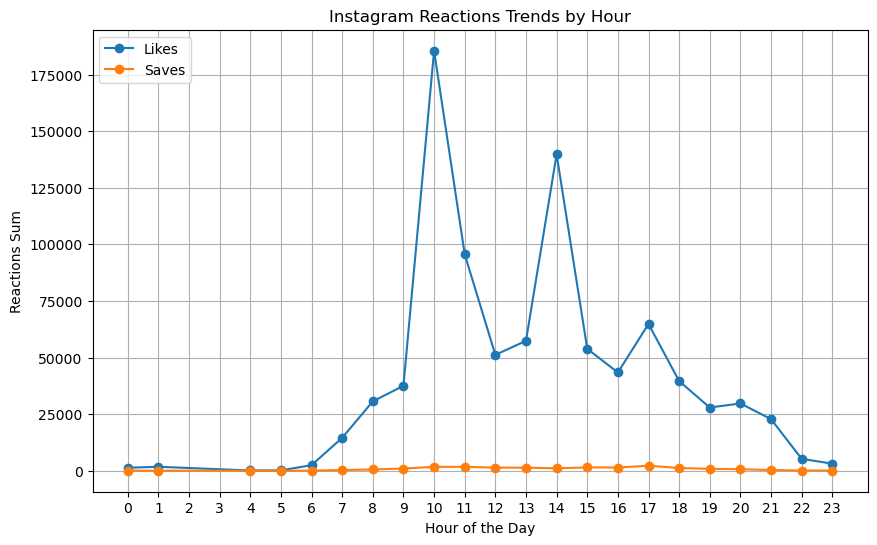

In [393]:
# Create a trend plot
plt.figure(figsize=(10, 6))


# Plot 'Likes'
plt.plot(inst_hourly_engagement.index, inst_hourly_engagement['Likes'], label='Likes', marker='o')
# Plot 'Love Reactions'
plt.plot(inst_hourly_engagement.index, inst_hourly_engagement['Saves'], label='Saves', marker='o')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Reactions Sum')
plt.title('Instagram Reactions Trends by Hour')
plt.xticks(hourly_engagement.index)
plt.grid(True)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()



**Observation**

* Likes of post are mostly seen during the working hours

* Saves of post does not have any significant pattern.

### Dive deeper insight on Instagram data

In this section, we are interested in uncovering pattern from the **Post Content** using Natural Language Processing techniques.

1. Feature Engineering

2. Statistical Approach.

3. Machine Learning Approach.

### Feature Engineering

In order to answer some questions, we have to engineer some key features

1. Length of each Post

2. Count of hastags in each post.

In [394]:
instagram_df['Post_Length'] = instagram_df['Post'].str.len()
instagram_df['Hashtag_count'] = instagram_df['Post'].str.count(r'#\w+')

**Key Question 6**

**Are there relationships between the length of a post and engagement?**

In [496]:
fig_2 = px.scatter(instagram_df, x='Post_Length', y='Engagements', title='Post_Length and Engagements')
fig_2.update_traces(marker=dict(size=12))  # Adjust marker size
fig_2.show()

In [396]:
# Extract X and Y
X = instagram_df[['Post_Length']]
Y = instagram_df['Engagements']

In [397]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model -0.10036729137355764 | Intercept of the model 120.00695458325498


**Observation**

* Shorter Post will recieve more engagement, than longer post.

**Key Question 7**

**Are there relationships between the count of Hashtags of a post and engagement?**

In [398]:
# Extract X and Y
X = instagram_df[['Hashtag_count']]
Y = instagram_df['Engagements']
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)
# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model 3.97564450292054 | Intercept of the model 93.3426923583782


**Observation**

* The positive slope suggests that incorporating hashtags can positively impact engagement, which could be beneficial for promotional campaigns or increasing visibility.

* Engagement= 3.976×Hashtag count +93.343

### Machine Learning Approach (Natural Language processing)

* Sentiment Analysis

### Sentiment Analysis

Having a sentiment analysis software can be used to improve the Brand Image, and content quality to derive engagement over time.

In [399]:
instagram_df['text_polarity'] = instagram_df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [401]:
# Interpret the score
def sentiment_tag(score):
    if score >= 0.05:
        return "Positive sentiment"
    elif score <= -0.05:
        return "Negative sentiment"
    else:
        return "Neutral sentiment"

In [402]:
instagram_df['sentiment_label'] =instagram_df['text_polarity'].map(sentiment_tag)

In [403]:
(instagram_df['sentiment_label'].value_counts(normalize=True) * 100).round(2)

Positive sentiment    73.42
Neutral sentiment     19.26
Negative sentiment     7.32
Name: sentiment_label, dtype: float64

In [404]:
instagram_df['sentiment_label'].value_counts()

Positive sentiment    7334
Neutral sentiment     1924
Negative sentiment     731
Name: sentiment_label, dtype: int64

In [405]:
((7334 * 1 + 1924*0 + 731 * -1)/ len(instagram_df['sentiment_label'])* 100)

66.1027129842827

**Observation**

* Only 7.31% of the post realeased on Instagram are seen as Negative post.

* The Net Sentiment Score is 66.1%

**Key Question 9**

**Which content creator's post is more of positive readable to the system**

In [406]:
instagram_df.groupby('Sent by')['text_polarity'].mean().reset_index().sort_values('text_polarity', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Damilare Oyekanmi's post have been the most positive post on Instagram.

**Key Question 10**

**Average Engagement per sentiment label**

In [407]:
instagram_df.groupby('sentiment_label')['Engagements'].mean().reset_index().sort_values('Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* we observed that Neutral post derives more engagement.

* Postive sentiment on Instagram is not driving much Engagement.

## Twitter Analysis

In [408]:
twitter_df['Post'].isnull().sum() ## twitter has no Post missing

0

In [409]:
twitter_df.isnull().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Link                                  48
Post                                   0
Linked Content                      3551
Impressions                          687
Organic Impressions                  687
Potential Reach                       80
Engagement Rate (per Impression)     688
Engagements                          687
Reactions                            687
Likes                                687
Comments                             687
Shares                               687
Click-Through Rate                  4916
Post Link Clicks                    4916
Other Post Clicks                    687
Post Clicks (All)                    687
Post Media Clicks                   1836
Post Hashtag Cli

**Drop the missing rows from engagement**

In [410]:
twitter_df = twitter_df.dropna(subset=['Engagements']).reset_index(drop=True)

In [411]:
twitter_df['Sent by'] = twitter_df['Sent by'].replace(' ', 'unknown')

In [412]:
twitter_df = twitter_df.fillna(value=-999) ## fill with -999 to indicate missing values

In [413]:
twitter_df['Sent by'].value_counts()

unknown              3698
Sophia Amuka         3184
Aramide Salami        483
Blessing Ubah         247
Kemi Amoo              90
Damilare Oyekanmi      68
Dunni Ogunsanya        66
Lilian Ibekwe           2
Rebecca Oyebode         1
Kanayo Obiano           1
Philip Nwagwunor        1
Patience Nnaji          1
Name: Sent by, dtype: int64

### Pre-process data

This is the section to correct some columns to their original data types.

* Convert date to the date time.

* Convert float data types to Integers (Optimization).

In [414]:
twitter_df['Date'] = pd.to_datetime(twitter_df['Date'])

In [415]:
### code to convert float data type to integer
for wrong_dtype in twitter_df.select_dtypes(include='float64').columns:
    twitter_df[wrong_dtype] = twitter_df[wrong_dtype].astype(int)

    
## Generate the date time features
twitter_df = extract_datetime_info(twitter_df, 'Date')

twitter_df['DayOfWeek'] = twitter_df['DayOfWeek'].map(dow_mapping)

twitter_df['Month'] = twitter_df['Month'].map(month_dict_by_number)

**Question 1**

What is the yearly trend of post on Twitter?

Purpose - This will help us to know, if Stanbic Bank is growing with social media advertistment trend

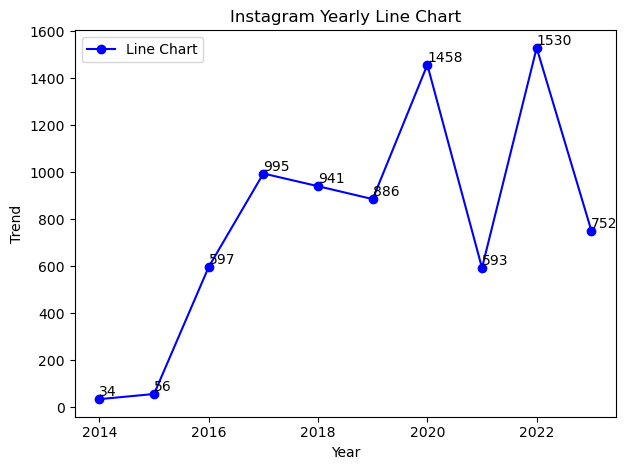

In [416]:
year_trend = twitter_df['Year'].value_counts().reset_index().rename(columns={'index':'Year', 'Year':'Trend'})
year_trend = year_trend.sort_values(by='Year').reset_index(drop=True)
create_line_chart_with_labels(year_trend['Year'], year_trend['Trend'], x_label='Year', y_label='Trend', title='Instagram Yearly Line Chart')

**Observation**

* we observed that we recorded most post in **2022** as at the month of September 2023.

**Question 2**

Who is the active social media content creator on Twitter?

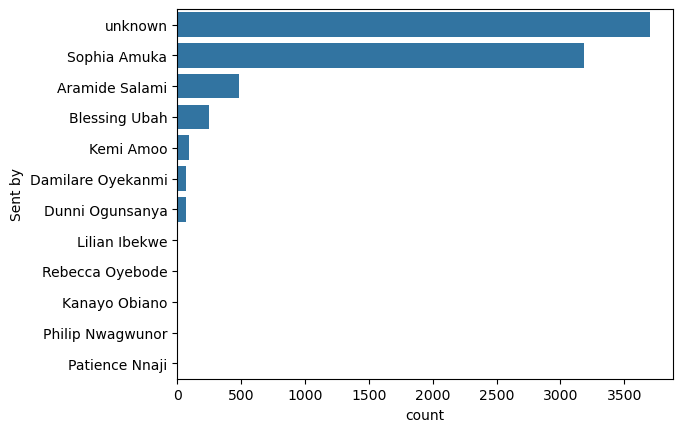

In [417]:
sns.countplot(y=twitter_df['Sent by'], color=dc, order=twitter_df['Sent by'].value_counts().keys());

**Observation**

* Most content creator's name on Instagram are missing (due to data ingestion) error.

* According to the name, Sophia Amuka handles most Twitter posts.

**Question 3**

The most common Content Type of post on Twitter?

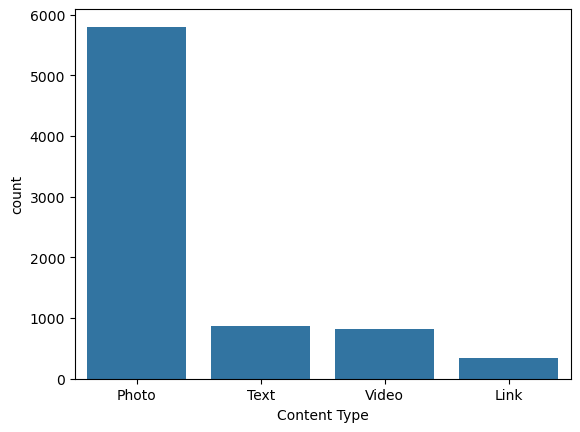

In [418]:
sns.countplot(x=twitter_df['Content Type'], color=dc, order=twitter_df['Content Type'].value_counts().keys());

**Observation**

* Most posts are associated with Photo which has the highest peak, then Text, Video and Link.

**Question 4**

On which day do they post the most on Twitter?

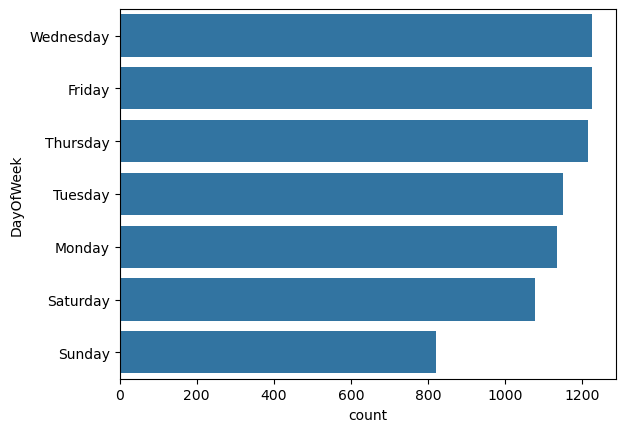

In [419]:
sns.countplot(y=twitter_df['DayOfWeek'], color=dc, order=twitter_df['DayOfWeek'].value_counts().keys());

**Observation** 

* Most posts are posted on **Wednesday**

**Question 5**

* What is the Month Frequency?

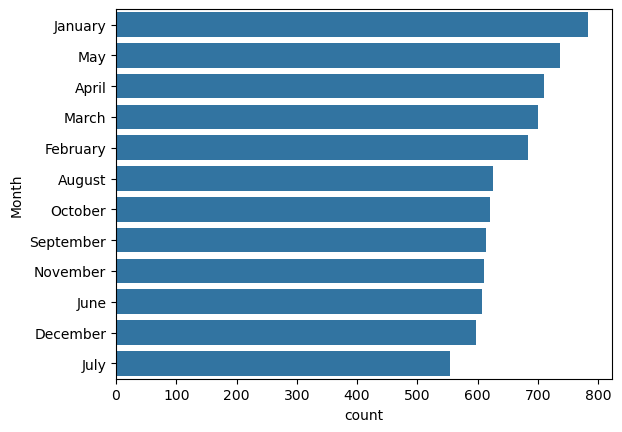

In [420]:
sns.countplot(y=twitter_df['Month'], color=dc, order=twitter_df['Month'].value_counts().keys());

**Observation**

* The bank is consistent with posting every month.

**Question 6**

* What is the Hour Frequency?

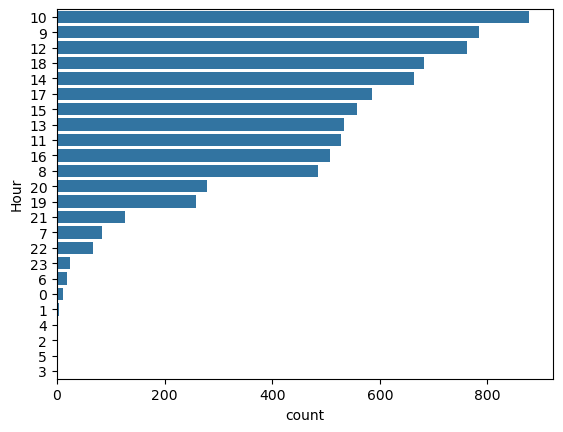

In [421]:
sns.countplot(y=twitter_df['Hour'], color=dc, order=twitter_df['Hour'].value_counts().keys());

In [422]:
twitter_df['Time_Zone'] = ['Morning' if 0 <= hour < 12 else 'Afternoon' if hour <=18 else 'Evening' for hour in twitter_df['Hour']]

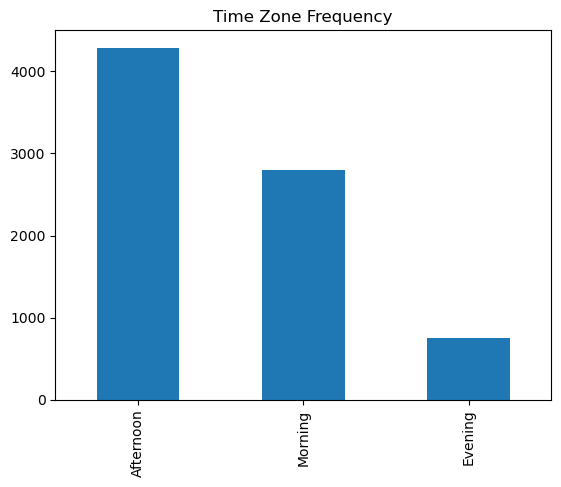

In [423]:
plt.title('Time Zone Frequency')
twitter_df['Time_Zone'].value_counts().plot(kind='bar');

**Observation**

* Most posts are made at 10:00AM in the morning

* According to time zone most post are made in the afternoon.

### Define Key Questions on Twitter Data

This is the section we observe trend for future recommendation(s)

**Key Question 1**

**What is the relationship between Engagements and Impressions?**

* This will be done by visuals and statistical analysis

In [495]:
fig3 = px.scatter(twitter_df, x='Impressions', y='Engagements', title='Impressions and Engagements for Twitter')
fig3.update_traces(marker=dict(size=12))  # Adjust marker size
fig3.show()

In [425]:
stats.pearsonr(twitter_df['Impressions'], twitter_df['Engagements'])

PearsonRResult(statistic=0.6180964948397304, pvalue=0.0)

**Observation**

* We observed a linear trend between Engagements and Impressions

* They are partially positively correlated with close to 62%

* They are statistically significant (p-value is less than 0.05)

**Key Questions 2**

**What are the most Engaging type of post?**

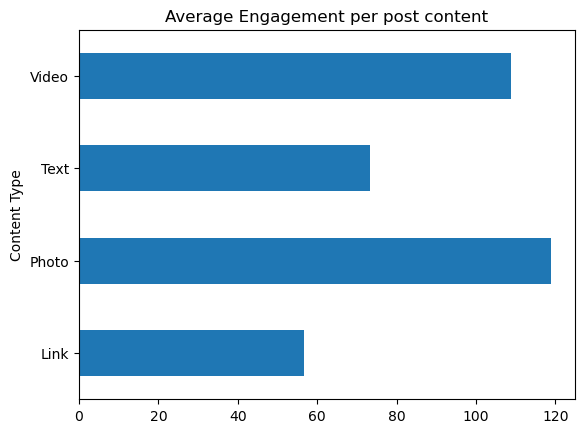

In [426]:
plt.title('Average Engagement per post content')
twitter_df.groupby('Content Type')['Engagements'].mean().plot(kind='barh');

**Observation**

* The most engaging type of post on average is **Photo** type, then **Video** type.

* Link and Text content type are closer in pattern.

**Key Question 3**

**Which day has the highest peak for post Engagements?**

we check overall best engagement day and quality of engagement in each day of the week.

In [427]:
twitter_df.groupby('DayOfWeek')['Engagements'].agg(['sum', 'mean']).reset_index().sort_values(by=['sum','mean'], ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Monday is peak day for post engagement.

**Key Question 4**

**Which Social media content creator has a quality performance on Engagement?**

In [428]:
twitter_df.groupby('Sent by')['Engagements'].mean().reset_index().sort_values(by='Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Damilare Oyekanmi's post is more quality, than other social media content creator.

**Key Question 5**

**On which hour of the day did we see more Likes, Comments on a post?**

In [429]:
twitter_hourly_engagement = twitter_df.groupby('Hour')[['Likes','Comments']].sum()

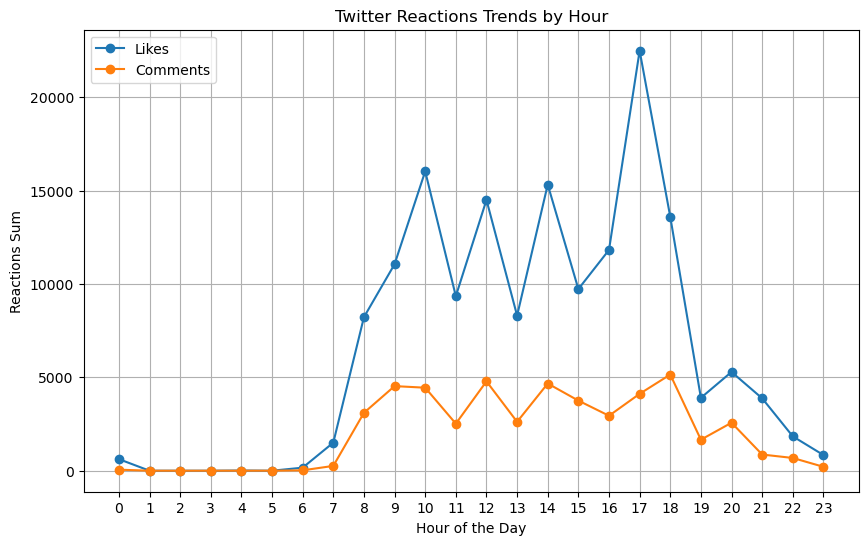

In [430]:
# Create a trend plot
plt.figure(figsize=(10, 6))


# Plot 'Likes'
plt.plot(twitter_hourly_engagement.index, twitter_hourly_engagement['Likes'], label='Likes', marker='o')
# Plot 'Love Reactions'
plt.plot(twitter_hourly_engagement.index, twitter_hourly_engagement['Comments'], label='Comments', marker='o')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Reactions Sum')
plt.title('Twitter Reactions Trends by Hour')
plt.xticks(twitter_hourly_engagement.index)
plt.grid(True)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()





**Observation**

* Likes of post are mostly seen during the work closing hours (5:00 pm).

* Comments on post are mostly seen on work closing hours (6:00 pm).

### Dive deeper insight on Twitter data

In this section, we are interested in uncovering pattern from the **Post Content** using Natural Language Processing techniques.

1. Feature Engineering

2. Statistical Approach.

3. Machine Learning Approach.

### Feature Engineering

In order to answer some questions, we have to engineer some key features

1. Length of each Post

2. Count of hastags in each post.

In [431]:
twitter_df['Post_Length'] = twitter_df['Post'].str.len()
twitter_df['Hashtag_count'] = twitter_df['Post'].str.count(r'#\w+')

**Key Question 6**

**Are there relationships between the length of a post and engagement?**

In [494]:
fig_3 = px.scatter(twitter_df, x='Post_Length', y='Engagements', title='Post_Length and Engagements')
fig_3.update_traces(marker=dict(size=12))  # Adjust marker size
fig_3.show()

In [433]:
# Extract X and Y
X = twitter_df[['Post_Length']]
Y = twitter_df['Engagements']

In [434]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model 0.10315603282163749 | Intercept of the model 92.8170510276046


**Observation**

* Longer Post will recieve more engagement.

**Key Question 7**

**Are there relationships between the count of Hashtags of a post and engagement?**

In [435]:
# Extract X and Y
X = twitter_df[['Hashtag_count']]
Y = twitter_df['Engagements']
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)
# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model -8.293278552409026 | Intercept of the model 119.53134278171308


**Observation**

* More Hashtags decrease the engagement of the post.


### Machine Learning Approach (Natural Language Processing)

* Sentiment Analysis

### Sentiment Analysis

In [436]:
twitter_df['text_polarity'] = twitter_df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [438]:
twitter_df['sentiment_label'] =twitter_df['text_polarity'].map(sentiment_tag)

In [439]:
(twitter_df['sentiment_label'].value_counts(normalize=True) * 100).round(2)

Positive sentiment    69.94
Neutral sentiment     22.19
Negative sentiment     7.87
Name: sentiment_label, dtype: float64

In [440]:
twitter_df['sentiment_label'].value_counts()

Positive sentiment    5485
Neutral sentiment     1740
Negative sentiment     617
Name: sentiment_label, dtype: int64

In [441]:
((5485 * 1 + 1740*0 + 617 * -1)/ len(twitter_df['sentiment_label'])* 100)

62.07600102014792

**Observation**

* we have 69.94% positive sentiment post.

* Only 7.86% of the posts realeased on Twitter are seen as Negative post.

* The Net Sentiment Score is 62.08%

**Key Question 9**

**Which content creator's post is more of positive readable to the system**

In [442]:
twitter_df.groupby('Sent by')['text_polarity'].mean().reset_index().sort_values('text_polarity', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Damilare Oyekanmi's post have been the most positive post on Twitter.

**Note**

* Philip Nwagwunor posted only once (which should not be used as a metric)

**Key Question 10**

**Average Engagement per sentiment label**

In [443]:
twitter_df.groupby('sentiment_label')['Engagements'].mean().reset_index().sort_values('Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* we observed that Negative posts derive more engagement.

* Neutral and Postive sentiments are driving exactly the same Engagement.

## LinkedLn Analysis

In [444]:
linkendln_df['Post'].isnull().sum()

31

In [445]:
## drop rows with Post as a missing value
linkendln_df = linkendln_df[~linkendln_df['Post'].isna()].reset_index(drop=True)

In [446]:
linkendln_df.isnull().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Link                                   4
Post                                   0
Impressions                         1428
Organic Impressions                 1428
Engagement Rate (per Impression)    1428
Engagements                         1428
Reactions                           1428
Likes                               1428
Comments                            1428
Shares                              1428
Click-Through Rate                  1428
Post Link Clicks                    1428
Post Clicks (All)                   1428
dtype: int64

In [447]:
linkendln_df = linkendln_df.dropna(subset=['Engagements']).reset_index(drop=True)

In [448]:
linkendln_df['Sent by'] = linkendln_df['Sent by'].replace(' ', 'unknown')

### Pre-process data

This is the section to correct some columns to their original data types.

* Convert date to the date time.

* Convert float data types to Integers (Optimization).

In [449]:
linkendln_df['Date'] = pd.to_datetime(linkendln_df['Date'])
### code to convert float data type to integer
for wrong_dtype in linkendln_df.select_dtypes(include='float64').columns:
    linkendln_df[wrong_dtype] = linkendln_df[wrong_dtype].astype(int)

    
## Generate the date time features
linkendln_df = extract_datetime_info(linkendln_df, 'Date')

linkendln_df['DayOfWeek'] = linkendln_df['DayOfWeek'].map(dow_mapping)

linkendln_df['Month'] = linkendln_df['Month'].map(month_dict_by_number)

**Question 1**

What is the yearly trend of posts on Linkendln?

Purpose - This will help us to know, if Stanbic Bank is growing with social media advertistment trend

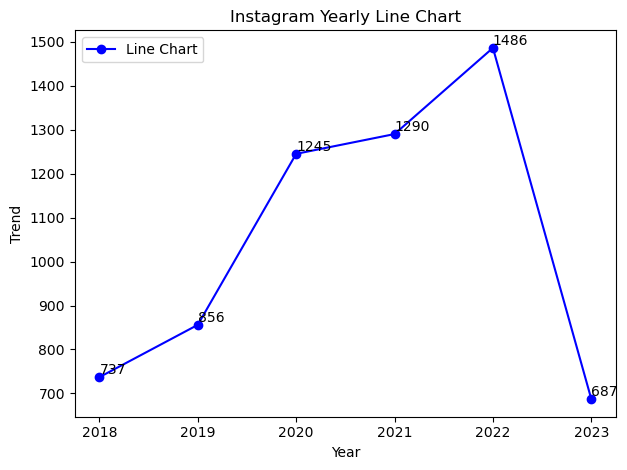

In [450]:
year_trend = linkendln_df['Year'].value_counts().reset_index().rename(columns={'index':'Year', 'Year':'Trend'})
year_trend = year_trend.sort_values(by='Year').reset_index(drop=True)
create_line_chart_with_labels(year_trend['Year'], year_trend['Trend'], x_label='Year', y_label='Trend', title='Instagram Yearly Line Chart')

**Observation**

* we observed that we recorded most posts in **2022** as at the month of September 2023.

**Question 2**

Who is the most active social media content creator on Linkedln?

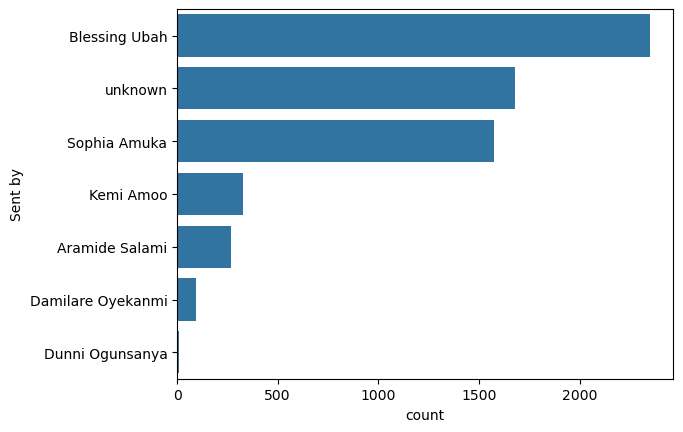

In [451]:
sns.countplot(y=linkendln_df['Sent by'], color=dc, order=linkendln_df['Sent by'].value_counts().keys());

**Observation**

* According to the name, Blessing Ubah handles most Linkedln posts.

**Question 3**

The most common Content Type post on Linkedln?

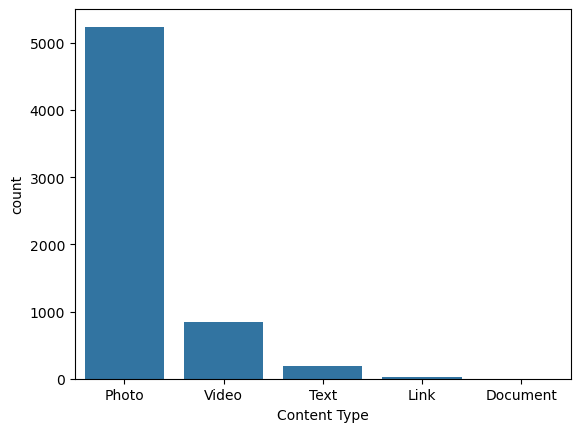

In [452]:
sns.countplot(x=linkendln_df['Content Type'], color=dc, order=linkendln_df['Content Type'].value_counts().keys());

**Observation**

* Most posts are associated with Photo which has the highest peak, then Video, Text, Link, and Document.

**Question 4**

**On which day, did they most post on Linkendln?**

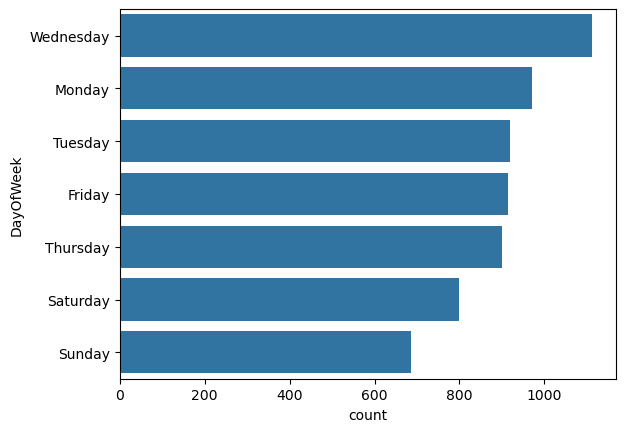

In [453]:
sns.countplot(y=linkendln_df['DayOfWeek'], color=dc, order=linkendln_df['DayOfWeek'].value_counts().keys());

**Observation** 

* Most posts are posted on **Wednesday**

**Question 5**

* What is the Month Frequency?

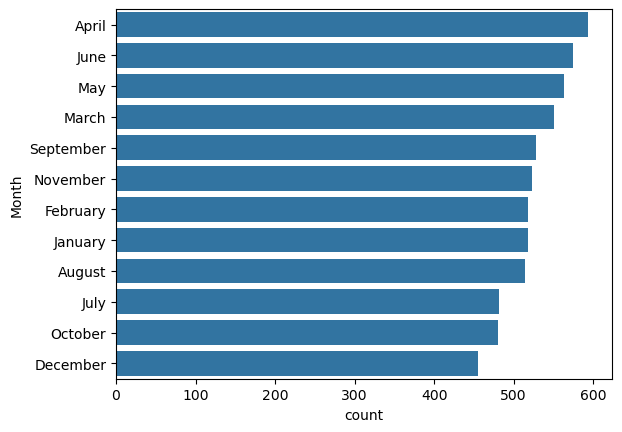

In [454]:
sns.countplot(y=linkendln_df['Month'], color=dc, order=linkendln_df['Month'].value_counts().keys());

**Observation**

* The bank is consistent with posting every month.

**Question 6**

* What is the Hour Frequency?

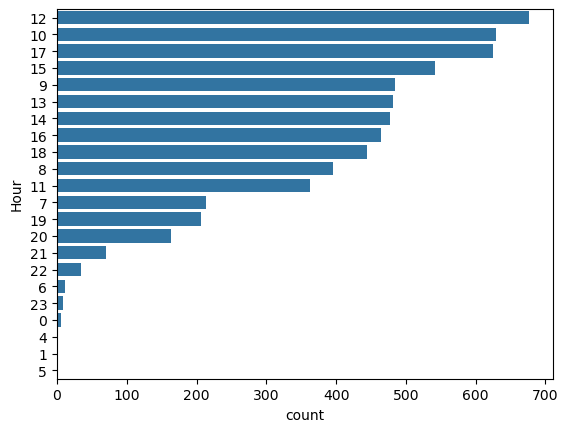

In [455]:
sns.countplot(y=linkendln_df['Hour'], color=dc, order=linkendln_df['Hour'].value_counts().keys());

In [456]:
linkendln_df['Time_Zone'] = ['Morning' if 0 <= hour < 12 else 'Afternoon' if hour <=18 else 'Evening' for hour in linkendln_df['Hour']]

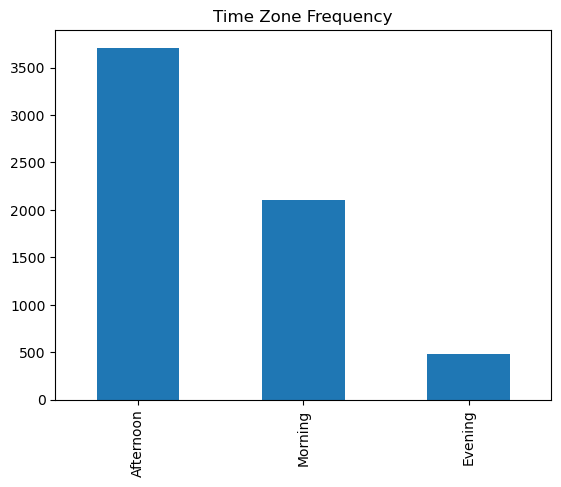

In [457]:
plt.title('Time Zone Frequency')
linkendln_df['Time_Zone'].value_counts().plot(kind='bar');

**Observation**

* Most posts are made at 12:00 noon in the Afternoon.

* According to time zone most post are made in the afternoon.

### Define Key Questions on Linkedln Data

This is the section we observe trend for future recommendation(s)

**Key Question 1**

**What is the relationship between Engagements and Impressions?**

* This will be done by visuals and statistical analysis

In [501]:
fig5 = px.scatter(linkendln_df, x='Impressions', y='Engagements', title='Impressions and Engagements for Linkedln')
fig5.update_traces(marker=dict(size=12))  # Adjust marker size
fig5.show()

In [459]:
stats.pearsonr(linkendln_df['Impressions'], linkendln_df['Engagements'])

PearsonRResult(statistic=0.6784917389082644, pvalue=0.0)

**Observation**

* We observed a linear trend between Engagements and Impressions

* They are partially positively correlated with close to 68%

* They are statistically significant (p-value is less than 0.05)

**Key Questions 2**

**What are the most Engaging type of post?**

In [460]:
### drop document content
linkendln_df = linkendln_df[linkendln_df['Content Type'] != 'Document'].reset_index(drop=True)

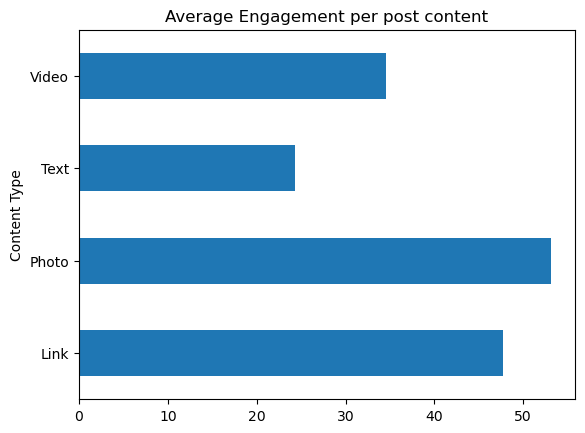

In [461]:
plt.title('Average Engagement per post content')
linkendln_df.groupby('Content Type')['Engagements'].mean().plot(kind='barh');

**Observation**

* The most engaging type of post on average is **Photo** type, then by **Link**, **Video**, and **Text**.


**Key Question 3**

**Which day has the highest peak for post Engagements?**

we check overall best engagement day and quality of engagement in each day of the week.

In [462]:
linkendln_df.groupby('DayOfWeek')['Engagements'].agg(['sum', 'mean']).reset_index().sort_values(by=['sum','mean'], ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Thursday is peak day for post engagement.

**Key Question 4**

**Which Social media content creator has a quality performance on Engagement?**

In [463]:
linkendln_df.groupby('Sent by')['Engagements'].mean().reset_index().sort_values(by='Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Unknown post is more quality.

* Damilare Oyekanmi post is more quality, than other social media content creators by name.

**Key Question 5**

**On which hour of the day did we see more Likes, Comments on a post?**

In [464]:
linkendln_hourly_engagement = linkendln_df.groupby('Hour')[['Likes','Comments']].sum()

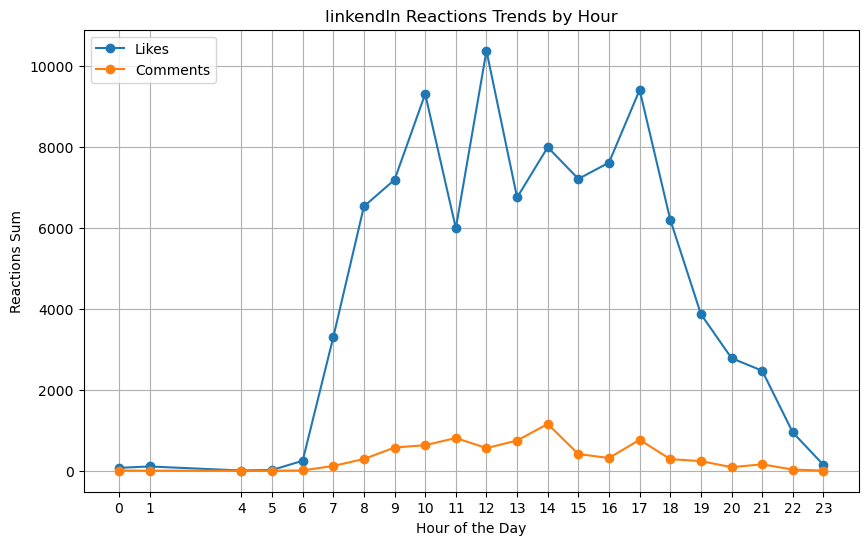

In [465]:
# Create a trend plot
plt.figure(figsize=(10, 6))


# Plot 'Likes'
plt.plot(linkendln_hourly_engagement.index, linkendln_hourly_engagement['Likes'], label='Likes', marker='o')
# Plot 'Love Reactions'
plt.plot(linkendln_hourly_engagement.index, linkendln_hourly_engagement['Comments'], label='Comments', marker='o')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Reactions Sum')
plt.title('linkendln Reactions Trends by Hour')
plt.xticks(linkendln_hourly_engagement.index)
plt.grid(True)

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()






**Observation**

* Likes of post a mostly seen during the noon.

* Comments on post are mostly during break hours


### Dive deeper insight on Twitter data

In this section, we are interested in uncovering pattern from the **Post Content** using Natural Language Processing techniques.

1. Feature Engineering

2. Statistical Approach.

3. Machine Learning Approach.

### Feature Engineering

In order to answer some questions, we have to engineer some key features

1. Length of each Post

2. Count of hastags in each post.

In [466]:
linkendln_df['Post_Length'] = linkendln_df['Post'].str.len()
linkendln_df['Hashtag_count'] = linkendln_df['Post'].str.count(r'#\w+')

**Key Question 6**

**Are there relationships between the length of a post and engagement?**

In [493]:
fig_4 = px.scatter(linkendln_df, x='Post_Length', y='Engagements', title='Post_Length and Engagements')
fig_4.update_traces(marker=dict(size=12))  # Adjust marker size
fig_4.show()

In [468]:
# Extract X and Y
X = linkendln_df[['Post_Length']]
Y = linkendln_df['Engagements']

In [469]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model 0.1414912609186188 | Intercept of the model 22.777063302922386


**Observation**

* Longer Post will recieve more engagement.

**Key Question 7**

**Are there relationships between the count of Hashtags of a post and engagement?**

In [470]:
# Extract X and Y
X = linkendln_df[['Hashtag_count']]
Y = linkendln_df['Engagements']
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)
# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f" Slope of the model {slope} | Intercept of the model {intercept}")

 Slope of the model 4.537648644090571 | Intercept of the model 43.29106850074753


**Observation**

* More Hashtags Increase the engagement of the post.

### Machine Learning Approach (Natural Language Processing)

* Sentiment Analysis

## Sentiment Analysis

In [471]:
linkendln_df['text_polarity'] = linkendln_df['Post'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [473]:
linkendln_df['sentiment_label'] =linkendln_df['text_polarity'].map(sentiment_tag)

In [474]:
(linkendln_df['sentiment_label'].value_counts(normalize=True) * 100).round(2)

Positive sentiment    75.84
Neutral sentiment     16.79
Negative sentiment     7.37
Name: sentiment_label, dtype: float64

In [475]:
linkendln_df['sentiment_label'].value_counts()

Positive sentiment    4778
Neutral sentiment     1058
Negative sentiment     464
Name: sentiment_label, dtype: int64

In [476]:
((4778 * 1 + 1058*0 + 464 * -1)/ len(linkendln_df['sentiment_label'])* 100)

68.47619047619048

In [477]:
len(linkendln_df['sentiment_label'])

6300

**Observation**

* we have 75.84% positive sentiment post.

* Only 7.36% of the post realeased on Linkedln are seen as Negative post.

* The Net Sentiment Score is 68.48%

**Key Question 9**

**Which content creator's post is more of positive readable to the system**

In [478]:
linkendln_df.groupby('Sent by')['text_polarity'].mean().reset_index().sort_values('text_polarity', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* Damilare Oyekanmi's post have been the most positive post on LinkedIn.

**Key Question 10**

**Average Engagement per sentiment label**

In [479]:
linkendln_df.groupby('sentiment_label')['Engagements'].mean().reset_index().sort_values('Engagements', ascending=False).style.background_gradient(cmap="Blues")

**Observation**

* we observed that Positive and Neutral posts derive more engagement.

* Negative sentiment derives little engagement.

## Extract data for Solution 2 phase

In [480]:
fb = facebook_df[['Post', 'sentiment_label','Network', 'Engagements']]
instagram = instagram_df[['Post', 'sentiment_label','Network','Engagements']]
twitter = twitter_df[['Post', 'sentiment_label','Network','Engagements']]
linkedln = linkendln_df[['Post', 'sentiment_label','Network','Engagements']]

In [481]:
df = pd.concat([fb, instagram, twitter,linkedln]).reset_index(drop=True)

In [482]:
df.to_csv('Post_data.csv', index=False)